# EPFL Extension School - Applied Data Science: Machine Learning

## *Capstone project by COMMENT Dany*

## *Chest X-ray Abnormalities Classification and Detection*


## Contents 

### [1. The problem](#1) 

### [2. The data](#2)

#### $\;\;\;$ [2.1. Clear overview of your data](#21)

#### $\;\;\;$ [2.2. Plan to manage and process the data](#22)

### [3. Exploratory data analysis (EDA)](#3)

#### $\;\;\;$ [3.1 Importing the .csv file into a dataframe](#31)

#### $\;\;\;$ [3.2 Number of times a disease was identified by the radiologists](#32)

#### $\;\;\;$ [3.3 Number of X-rays per disease](#33)

#### $\;\;\;$ [3.4 Number of X-rays with 1, 2, 3, .... diseases](#34)

#### $\;\;\;$ [3.5 Percentage of X-rays and diseases identified by each radiologist](#35)

#### $\;\;\;$ [3.6 Visualization of the diseases and their location](#36)

#### $\;\;\;\;\;\;\;\;$ [3.6.1 On different X-rays](#361)

#### $\;\;\;\;\;\;\;\;$ [3.6.2 Overlaid in normalized graphics for each disease](#362)

#### $\;\;\;\;\;\;\;\;$ [3.6.3 Locating all classes on a single normalized graph](#363)

#### $\;\;\;\;\;\;\;\;$ [3.7 Concatenation of several image histograms for each class](#37)

### [4. Machine learning](#4)

#### $\;\;\;$ [4.1 Image classification](#41)

#### $\;\;\;\;\;\;\;\;$ [4.1.1 Generation of sets and classes](#411)

#### $\;\;\;\;\;\;\;\;$ [4.1.2 Images preprocessing](#412)

#### $\;\;\;\;\;\;\;\;$ [4.1.3 Feature extraction](#413)

#### $\;\;\;\;\;\;\;\;$ [4.1.4 Logistic regression baseline](#414)

#### $\;\;\;\;\;\;\;\;$ [4.1.5 Nonlinear classifier - Support machine vector with radial basis funtion kernel](#415)

#### $\;\;\;\;\;\;\;\;$ [4.1.6 Nonlinear classifier - Random forest](#416)

#### $\;\;\;\;\;\;\;\;$ [4.1.7 Model comparison](#417)

#### $\;\;\;$ [4.2 Image detection](#42)

#### $\;\;\;\;\;\;\;\;$ [4.2.1 Data preparation](#421)

#### $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ [4.2.1.1 Functions to combine the different boxes of the images](#4211)

#### $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ [4.2.1.2 Concatenation and normalisation of all boxes in each image into new dataframes](#4212)

#### $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ [4.2.1.3 Example of the processing applied to an image](#4213)

#### $\;\;\;\;\;\;\;\;$ [4.2.2 Processing of the training and validation dataset](#422)

#### $\;\;\;\;\;\;\;\;$ [4.2.3 Saving TXT files](#423)

#### $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ [4.2.3.1 Images with non-labeled objects](#4231)

#### $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ [4.2.3.2 Training and validation TXT files](#4232)

#### $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ [4.2.3.3 TXT file for each image](#4233)

#### $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ [4.2.3.4 TXT files for Yolo V5](#4233)

#### $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ [4.2.3.5 Resizing images](#4235)

#### $\;\;\;$ [4.3 Training YoloV5 on Google Colab](#43)

#### $\;\;\;\;\;\;\;\;$ [4.3.1 Modification of the YAML files](#431)

#### $\;\;\;\;\;\;\;\;$ [4.3.2 Commands for training the algorithm](#432)

#### $\;\;\;\;\;\;\;\;$ [4.3.3 Results](#432)

### [5. Conclusions and perspectives](#5)


## Websites

- https://www.kaggle.com/c/vinbigdata-chest-xray-abnormalities-detection/data

- https://github.com/pjreddie/darknet

- https://learn.extensionschool.ch/learn

- https://github.com/ultralytics/yolov5

## 1. The problem <a class="anchor" id="1"></a>

The aim of the project is to use data from a Kaggle competition to classify and detect thoracis abnormalities from chest X-rays. This study is an opportunity to put into practice the knowledge in image classification and to acquire new knowledge in image detection.

## 2. The data <a class="anchor" id="2"></a>

### 2.1. Clear overview of your data <a class="anchor" id="21"></a>

The dataset contains 18'000 scans and all images were labeled by 17 experienced radiologists according to 14 pathologies:

- 0 - Aortic enlargement
- 1 - Atelectasis
- 2 - Calcification
- 3 - Cardiomegaly
- 4 - Consolidation
- 5 - ILD
- 6 - Infiltration
- 7 - Lung Opacity
- 8 - Nodule/Mass
- 9 - Other lesion
- 10 - Pleural effusion
- 11 - Pleural thickening
- 12 - Pneumothorax
- 13 - Pulmonary fibrosis
- 14 - No Finding

For each image, different information are transmitted in a .csv file:

- **image_id** - unique image identifier
- **class_name** - the name of the class of detected object (or "No finding")
- **class_id** - the ID of the class of detected object
- **rad_id** - the ID of the radiologist that made the observation
- **x_min** - minimum X coordinate of the object's bounding box
- **y_min** - minimum Y coordinate of the object's bounding box
- **x_max** - maximum X coordinate of the object's bounding box
- **y_max** - maximum Y coordinate of the object's bounding box

The dataset is divided into two sets, one for training with 15'000 images and one for testing with 3'000 images.

### 2.2. Plan to manage and process the data <a class="anchor" id="22"></a>

For the data preprocessing, the following steps will be follow:

**1.** Feature extraction for a binary classification that detect if a patient is healthy or not.

**2.** Concatenation of all the boxes identified by the radiologists to obtain a clear dataset for the image detection.

## 3. Exploratory data analysis (EDA) <a class="anchor" id="3"></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from natsort import natsorted
import os
import cv2
import random
from matplotlib.patches import Rectangle
import random
import shutil
import itertools
from natsort import index_natsorted, order_by_index
import collections 

pd.set_option('max_colwidth', 200)

### 3.1 Importing the .csv file into a dataframe <a class="anchor" id="31"></a>

In [3]:
df = pd.read_csv('train.csv', sep=';')
print('The shape of df:', df.shape)
df.head(5)

The shape of df: (67914, 10)


image_id          class_name  class_id rad_id  \
0  50a418190bc3fb1ef1633bf9678929b3          No finding        14    R11   
1  21a10246a5ec7af151081d0cd6d65dc9          No finding        14     R7   
2  9a5094b2563a1ef3ff50dc5c7ff71345        Cardiomegaly         3    R10   
3  051132a778e61a86eb147c7c6f564dfe  Aortic enlargement         0    R10   
4  063319de25ce7edb9b1c6b8881290140          No finding        14    R10   

    x_min   y_min   x_max   y_max  width  height  
0     NaN     NaN     NaN     NaN   2332    2580  
1     NaN     NaN     NaN     NaN   2954    3159  
2   691.0  1375.0  1653.0  1831.0   2080    2336  
3  1264.0   743.0  1611.0  1019.0   2304    2880  
4     NaN     NaN     NaN     NaN   2540    3072

Each image can be annotated by several radiologists who may have found different diseases with different locations as shown in the image below. A strategy should therefore be chosen to combine these findings.

In [4]:
df[df['image_id'] == df.loc[10,'image_id']]

image_id        class_name  class_id rad_id  \
10     7c1add6833d5f0102b0d3619a1682a64      Lung Opacity         7    R10   
790    7c1add6833d5f0102b0d3619a1682a64  Pleural effusion        10    R10   
1220   7c1add6833d5f0102b0d3619a1682a64      Lung Opacity         7     R9   
26186  7c1add6833d5f0102b0d3619a1682a64  Pleural effusion        10     R8   
32486  7c1add6833d5f0102b0d3619a1682a64  Pleural effusion        10     R9   
33993  7c1add6833d5f0102b0d3619a1682a64     Consolidation         4     R9   

       x_min   y_min   x_max   y_max  width  height  
10     600.0  1332.0   903.0  1523.0   2944    3014  
790    357.0   781.0  1323.0  2421.0   2944    3014  
1220   585.0  1296.0  1010.0  1600.0   2944    3014  
26186  384.0   814.0  1333.0  2376.0   2944    3014  
32486  281.0   739.0  1242.0  2281.0   2944    3014  
33993  585.0  1296.0  1010.0  1600.0   2944    3014

In [5]:
%store df

Stored 'df' (DataFrame)


### 3.2 Number of times a disease was identified by the radiologists <a class="anchor" id="32"></a>

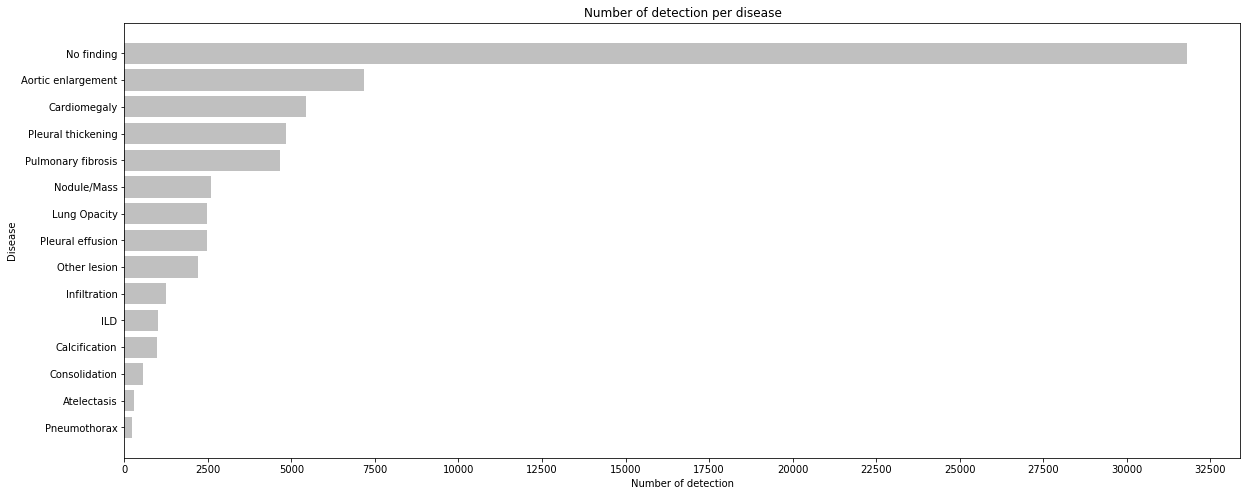

In [9]:
nbr_images = df.pivot_table(index = ['class_name'], aggfunc ='size').sort_values() 

fig, ax = plt.subplots(figsize=(20, 8))
ax.barh(nbr_images.index, nbr_images, align='center', color='silver')
ax.set_xticks(np.arange(0,35000,2500))
ax.set_ylabel('Disease')
ax.set_xlabel('Number of detection')
ax.set_title('Number of detection per disease')
plt.show()

The class 'No finding' is much more represented so we have to keep this in mind for the images classification and detection.

### 3.3 Number of X-rays per disease <a class="anchor" id="33"></a>

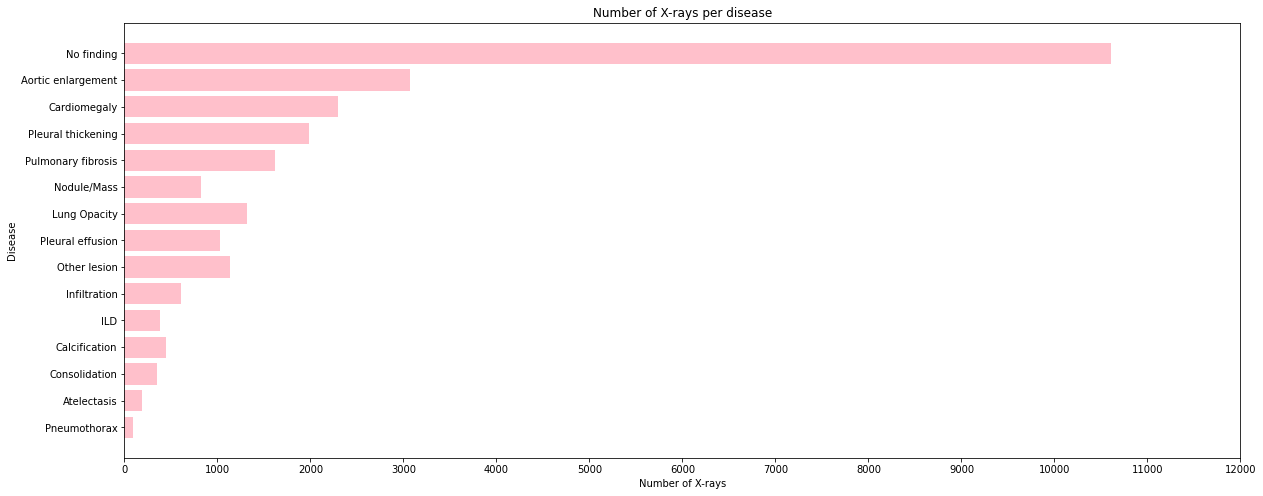

In [10]:
diseases = nbr_images.index

count_disease =[]
for i in diseases:
    df_id = df[df['class_name'] == i]
    images_id = len(np.unique(df_id['image_id']))
    count_disease.append(images_id)
    
fig, ax = plt.subplots(figsize=(20, 8))
ax.barh(diseases, count_disease, align='center', color='pink')
ax.set_xticks(np.arange(0,13000,1000))
ax.set_ylabel('Disease')
ax.set_xlabel('Number of X-rays')
ax.set_title('Number of X-rays per disease')
plt.show()

### 3.4 Number of X-rays with 1, 2, 3, .... diseases <a class="anchor" id="34"></a>

In [11]:
images_id = np.unique(df['image_id'])
d = {'image_id': images_id, 'nbr_diseases': np.zeros(len(images_id))}
df_34 = pd.DataFrame(data=d)
df_34.set_index('image_id', inplace=True)

df_no_14 = df[df['class_id'] != 14]

for i in images_id:
    df_image = df_no_14[df_no_14['image_id'] == i]
    image_diseases = np.unique(df_image['class_name'])
    nbr_diseases = len(image_diseases) 
    df_34.loc[i, 'nbr_diseases'] = nbr_diseases

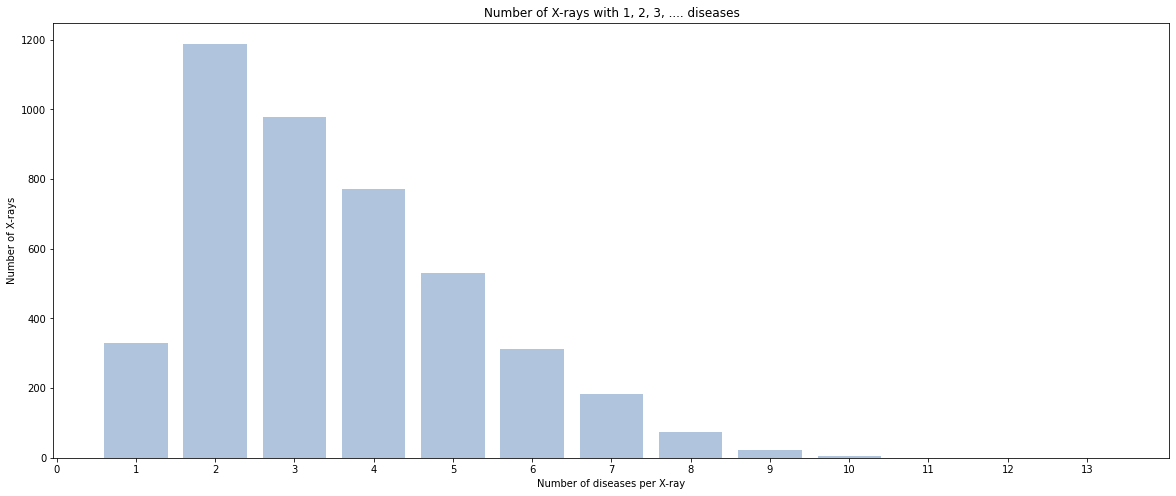

In [12]:
count_df_34 = df_34['nbr_diseases'].value_counts().sort_index()
more_than_10 = pd.Series([0.0, 0.0, 0.0], index=['11.0', '12.0', '13.0'])
count_df_34 = count_df_34.drop([0])
count_df_34 = count_df_34.append(more_than_10)

fig, ax = plt.subplots(figsize=(20, 8))
ax.bar(count_df_34.index.values.astype(float), count_df_34, align='center', color='lightsteelblue')
ax.set_xticks(np.arange(0,14,1))
ax.set_ylabel('Number of X-rays')
ax.set_xlabel('Number of diseases per X-ray')
ax.set_title('Number of X-rays with 1, 2, 3, .... diseases')
plt.show()

Let's see how the diseases are balanced in these different classes.

In [13]:
diseases_with = np.unique(df_no_14['class_name'])

In [14]:
diseases_combi = []
combi = []

for i in np.arange(10):
    diseases_i = list(itertools.combinations(diseases_with, i+1))
    val_i = np.empty(len(diseases_i ))
    val_i.fill(i+1)
    
    diseases_combi.extend(diseases_i)
    combi.extend(val_i)

In [16]:
count_disesases = np.zeros(len(diseases_combi), dtype=int)

for i in images_id:
    
    k = 0
    
    df_image = df_no_14[df_no_14['image_id'] == i]
    image_diseases = np.unique(df_image['class_name'])

    for j in diseases_combi:

        k = k+1

        if collections.Counter(j) == collections.Counter(image_diseases):
            count_disesases[k-1] = count_disesases[k-1] + 1

In [30]:
data_disease_combi = {'Nbr_diseases': combi, 'Diseases': diseases_combi, 'Nbr_times':count_disesases}
df_disease_combi = pd.DataFrame(data=data_disease_combi)
df_disease_combi = df_disease_combi[df_disease_combi['Nbr_times'] != 0]

df_disease_combi.to_pickle('df_disease_combi')

In [31]:
df_disease_combi = pd.read_pickle('df_disease_combi')

In [32]:
df_disease_combi[df_disease_combi['Nbr_diseases'] == 1][['Diseases', 'Nbr_times']].sort_values('Nbr_times', ascending=False).head(10)

Diseases  Nbr_times
0   (Aortic enlargement,)        142
3         (Cardiomegaly,)         94
13  (Pulmonary fibrosis,)         38
10    (Pleural effusion,)         15
8          (Nodule/Mass,)         13
11  (Pleural thickening,)         12
9         (Other lesion,)          8
2        (Calcification,)          4
5                  (ILD,)          1
7         (Lung Opacity,)          1

In [33]:
df_disease_combi[df_disease_combi['Nbr_diseases'] == 2][['Diseases', 'Nbr_times']].sort_values('Nbr_times', ascending=False).head(10)

Diseases  Nbr_times
16         (Aortic enlargement, Cardiomegaly)        709
24   (Aortic enlargement, Pleural thickening)         69
103  (Pleural thickening, Pulmonary fibrosis)         50
26   (Aortic enlargement, Pulmonary fibrosis)         38
21          (Aortic enlargement, Nodule/Mass)         25
22         (Aortic enlargement, Other lesion)         23
83         (Infiltration, Pulmonary fibrosis)         22
99     (Pleural effusion, Pleural thickening)         20
55               (Cardiomegaly, Other lesion)         17
86           (Lung Opacity, Pleural effusion)         16

In [34]:
df_disease_combi[df_disease_combi['Nbr_diseases'] == 3][['Diseases', 'Nbr_times']].sort_values('Nbr_times', ascending=False).head(10)

Diseases  Nbr_times
135        (Aortic enlargement, Cardiomegaly, Pleural thickening)        224
137        (Aortic enlargement, Cardiomegaly, Pulmonary fibrosis)         75
133              (Aortic enlargement, Cardiomegaly, Other lesion)         55
131              (Aortic enlargement, Cardiomegaly, Lung Opacity)         39
177    (Aortic enlargement, Pleural effusion, Pleural thickening)         32
181  (Aortic enlargement, Pleural thickening, Pulmonary fibrosis)         25
117             (Aortic enlargement, Calcification, Cardiomegaly)         22
132               (Aortic enlargement, Cardiomegaly, Nodule/Mass)         21
466    (Pleural effusion, Pleural thickening, Pulmonary fibrosis)         18
418              (Infiltration, Lung Opacity, Pulmonary fibrosis)         17

In [35]:
df_disease_combi[df_disease_combi['Nbr_diseases'] == 4][['Diseases', 'Nbr_times']].sort_values('Nbr_times', ascending=False).head(10)

Diseases  \
629        (Aortic enlargement, Cardiomegaly, Pleural effusion, Pleural thickening)   
633      (Aortic enlargement, Cardiomegaly, Pleural thickening, Pulmonary fibrosis)   
626            (Aortic enlargement, Cardiomegaly, Other lesion, Pleural thickening)   
615                  (Aortic enlargement, Cardiomegaly, Lung Opacity, Other lesion)   
752  (Aortic enlargement, Pleural effusion, Pleural thickening, Pulmonary fibrosis)   
620                   (Aortic enlargement, Cardiomegaly, Nodule/Mass, Other lesion)   
542           (Aortic enlargement, Calcification, Cardiomegaly, Pleural thickening)   
628            (Aortic enlargement, Cardiomegaly, Other lesion, Pulmonary fibrosis)   
613            (Aortic enlargement, Cardiomegaly, Infiltration, Pulmonary fibrosis)   
619            (Aortic enlargement, Cardiomegaly, Lung Opacity, Pulmonary fibrosis)   

     Nbr_times  
629         51  
633         41  
626         34  
615         29  
752         22  
620         18  
542         17  
628         16  
613         13  
619         13

In [36]:
df_disease_combi[df_disease_combi['Nbr_diseases'] == 5][['Diseases', 'Nbr_times']].sort_values('Nbr_times', ascending=False).head(10)

Diseases  \
1965        (Aortic enlargement, Cardiomegaly, Other lesion, Pleural effusion, Pleural thickening)   
2181  (Aortic enlargement, Other lesion, Pleural effusion, Pleural thickening, Pulmonary fibrosis)   
1953      (Aortic enlargement, Cardiomegaly, Lung Opacity, Pleural thickening, Pulmonary fibrosis)   
1949        (Aortic enlargement, Cardiomegaly, Lung Opacity, Pleural effusion, Pleural thickening)   
2167  (Aortic enlargement, Lung Opacity, Pleural effusion, Pleural thickening, Pulmonary fibrosis)   
1972  (Aortic enlargement, Cardiomegaly, Pleural effusion, Pleural thickening, Pulmonary fibrosis)   
1948            (Aortic enlargement, Cardiomegaly, Lung Opacity, Other lesion, Pulmonary fibrosis)   
1946            (Aortic enlargement, Cardiomegaly, Lung Opacity, Other lesion, Pleural thickening)   
1969      (Aortic enlargement, Cardiomegaly, Other lesion, Pleural thickening, Pulmonary fibrosis)   
3433        (Infiltration, Lung Opacity, Pleural effusion, Pleural thickening, Pulmonary fibrosis)   

      Nbr_times  
1965         16  
2181         16  
1953         15  
1949         15  
2167         13  
1972         12  
1948         11  
1946         11  
1969         10  
3433          9

In [37]:
df_disease_combi[df_disease_combi['Nbr_diseases'] == 6][['Diseases', 'Nbr_times']].sort_values('Nbr_times', ascending=False).head(10)

Diseases  \
4489  (Aortic enlargement, Cardiomegaly, Lung Opacity, Pleural effusion, Pleural thickening, Pulmonary fibrosis)   
4749  (Aortic enlargement, Lung Opacity, Other lesion, Pleural effusion, Pleural thickening, Pulmonary fibrosis)   
4476         (Aortic enlargement, Cardiomegaly, Lung Opacity, Nodule/Mass, Pleural effusion, Pleural thickening)   
4482        (Aortic enlargement, Cardiomegaly, Lung Opacity, Other lesion, Pleural effusion, Pleural thickening)   
4473             (Aortic enlargement, Cardiomegaly, Lung Opacity, Nodule/Mass, Other lesion, Pleural thickening)   
4496       (Aortic enlargement, Cardiomegaly, Nodule/Mass, Other lesion, Pleural thickening, Pulmonary fibrosis)   
6352       (Consolidation, Infiltration, Lung Opacity, Pleural effusion, Pleural thickening, Pulmonary fibrosis)   
4446        (Aortic enlargement, Cardiomegaly, Infiltration, Lung Opacity, Pleural effusion, Pleural thickening)   
4742       (Aortic enlargement, Lung Opacity, Nodule/Mass, Other lesion, Pleural thickening, Pulmonary fibrosis)   
4480       (Aortic enlargement, Cardiomegaly, Lung Opacity, Nodule/Mass, Pleural thickening, Pulmonary fibrosis)   

      Nbr_times  
4489          9  
4749          9  
4476          8  
4482          8  
4473          7  
4496          6  
6352          5  
4446          5  
4742          5  
4480          5

In [38]:
df_disease_combi[df_disease_combi['Nbr_diseases'] == 7][['Diseases', 'Nbr_times']].sort_values('Nbr_times', ascending=False).head(10)

Diseases  \
7971   (Aortic enlargement, Cardiomegaly, Lung Opacity, Other lesion, Pleural effusion, Pleural thickening, Pulmonary fibrosis)   
7967    (Aortic enlargement, Cardiomegaly, Lung Opacity, Nodule/Mass, Pleural effusion, Pleural thickening, Pulmonary fibrosis)   
7466       (Aortic enlargement, Calcification, Cardiomegaly, Nodule/Mass, Other lesion, Pleural thickening, Pulmonary fibrosis)   
8068  (Aortic enlargement, Consolidation, Infiltration, Lung Opacity, Pleural effusion, Pleural thickening, Pulmonary fibrosis)   
7837  (Aortic enlargement, Cardiomegaly, Consolidation, Lung Opacity, Pleural effusion, Pleural thickening, Pulmonary fibrosis)   
7450       (Aortic enlargement, Calcification, Cardiomegaly, Lung Opacity, Nodule/Mass, Pleural thickening, Pulmonary fibrosis)   
9770         (Cardiomegaly, Infiltration, Lung Opacity, Other lesion, Pleural effusion, Pleural thickening, Pulmonary fibrosis)   
7868                (Aortic enlargement, Cardiomegaly, ILD, Infiltration, Lung Opacity, Pleural thickening, Pulmonary fibrosis)   
8174   (Aortic enlargement, Infiltration, Lung Opacity, Other lesion, Pleural effusion, Pleural thickening, Pulmonary fibrosis)   
8185    (Aortic enlargement, Lung Opacity, Nodule/Mass, Other lesion, Pleural effusion, Pleural thickening, Pulmonary fibrosis)   

      Nbr_times  
7971          9  
7967          6  
7466          5  
8068          5  
7837          5  
7450          4  
9770          3  
7868          3  
8174          3  
8185          3

In [39]:
df_disease_combi[df_disease_combi['Nbr_diseases'] == 8][['Diseases', 'Nbr_times']].sort_values('Nbr_times', ascending=False).head(10)

Diseases  \
11380  (Aortic enlargement, Cardiomegaly, Consolidation, Infiltration, Lung Opacity, Pleural effusion, Pleural thickening, Pulmonary fibrosis)   
11566   (Aortic enlargement, Consolidation, Infiltration, Lung Opacity, Nodule/Mass, Pleural effusion, Pleural thickening, Pulmonary fibrosis)   
11486   (Aortic enlargement, Cardiomegaly, Infiltration, Lung Opacity, Other lesion, Pleural effusion, Pleural thickening, Pulmonary fibrosis)   
11069   (Aortic enlargement, Calcification, Cardiomegaly, Lung Opacity, Nodule/Mass, Pleural effusion, Pleural thickening, Pulmonary fibrosis)   
11409  (Aortic enlargement, Cardiomegaly, Consolidation, Lung Opacity, Other lesion, Pleural effusion, Pleural thickening, Pulmonary fibrosis)   
11398         (Aortic enlargement, Cardiomegaly, Consolidation, Lung Opacity, Nodule/Mass, Other lesion, Pleural effusion, Pleural thickening)   
11987         (Atelectasis, Calcification, Consolidation, Lung Opacity, Nodule/Mass, Pleural effusion, Pleural thickening, Pulmonary fibrosis)   
11479        (Aortic enlargement, Cardiomegaly, Infiltration, Lung Opacity, Nodule/Mass, Other lesion, Pleural thickening, Pulmonary fibrosis)   
11450            (Aortic enlargement, Cardiomegaly, ILD, Infiltration, Other lesion, Pleural effusion, Pleural thickening, Pulmonary fibrosis)   
11287   (Aortic enlargement, Calcification, Lung Opacity, Nodule/Mass, Other lesion, Pleural effusion, Pleural thickening, Pulmonary fibrosis)   

       Nbr_times  
11380          5  
11566          4  
11486          4  
11069          3  
11409          3  
11398          3  
11987          2  
11479          2  
11450          2  
11287          2

In [40]:
df_disease_combi[df_disease_combi['Nbr_diseases'] == 9][['Diseases', 'Nbr_times']].sort_values('Nbr_times', ascending=False).head(10)

Diseases  \
13488   (Aortic enlargement, Atelectasis, Cardiomegaly, Consolidation, Lung Opacity, Other lesion, Pleural effusion, Pleural thickening, Pulmonary fibrosis)   
14181   (Aortic enlargement, Consolidation, Infiltration, Lung Opacity, Nodule/Mass, Other lesion, Pleural effusion, Pleural thickening, Pulmonary fibrosis)   
14099  (Aortic enlargement, Cardiomegaly, Consolidation, Infiltration, Lung Opacity, Other lesion, Pleural effusion, Pleural thickening, Pulmonary fibrosis)   
13355   (Aortic enlargement, Atelectasis, Calcification, Infiltration, Lung Opacity, Other lesion, Pleural effusion, Pleural thickening, Pulmonary fibrosis)   
14868                 (Cardiomegaly, Consolidation, ILD, Infiltration, Lung Opacity, Other lesion, Pleural effusion, Pleural thickening, Pulmonary fibrosis)   
14593               (Atelectasis, Cardiomegaly, Consolidation, Infiltration, Lung Opacity, Other lesion, Pleural effusion, Pleural thickening, Pneumothorax)   
14174            (Aortic enlargement, Consolidation, ILD, Lung Opacity, Nodule/Mass, Other lesion, Pleural effusion, Pleural thickening, Pulmonary fibrosis)   
14127            (Aortic enlargement, Cardiomegaly, ILD, Infiltration, Lung Opacity, Other lesion, Pleural effusion, Pleural thickening, Pulmonary fibrosis)   
14110   (Aortic enlargement, Cardiomegaly, Consolidation, Lung Opacity, Nodule/Mass, Other lesion, Pleural effusion, Pleural thickening, Pulmonary fibrosis)   
14038                  (Aortic enlargement, Cardiomegaly, Consolidation, ILD, Infiltration, Lung Opacity, Nodule/Mass, Pleural effusion, Pulmonary fibrosis)   

       Nbr_times  
13488          3  
14181          2  
14099          2  
13355          1  
14868          1  
14593          1  
14174          1  
14127          1  
14110          1  
14038          1

In [41]:
df_disease_combi[df_disease_combi['Nbr_diseases'] == 10][['Diseases', 'Nbr_times']].sort_values('Nbr_times', ascending=False).head(10)

Diseases  \
15320   (Aortic enlargement, Atelectasis, Cardiomegaly, Consolidation, Lung Opacity, Nodule/Mass, Other lesion, Pleural effusion, Pleural thickening, Pulmonary fibrosis)   
15373           (Aortic enlargement, Atelectasis, Consolidation, ILD, Infiltration, Lung Opacity, Other lesion, Pleural effusion, Pleural thickening, Pulmonary fibrosis)   
15453         (Aortic enlargement, Calcification, Cardiomegaly, Consolidation, ILD, Lung Opacity, Other lesion, Pleural effusion, Pleural thickening, Pulmonary fibrosis)   
15625  (Aortic enlargement, Consolidation, Infiltration, Lung Opacity, Nodule/Mass, Other lesion, Pleural effusion, Pleural thickening, Pneumothorax, Pulmonary fibrosis)   

       Nbr_times  
15320          1  
15373          1  
15453          1  
15625          1

### 3.5 Percentage of X-rays and diseases identified by each radiologist <a class="anchor" id="35"></a>

In order to have a robust model, we want each radiologist to have identified the same percentage of the 15'000 X-rays. Ideally each radiologist should have analyzed 100% of the X-rays.

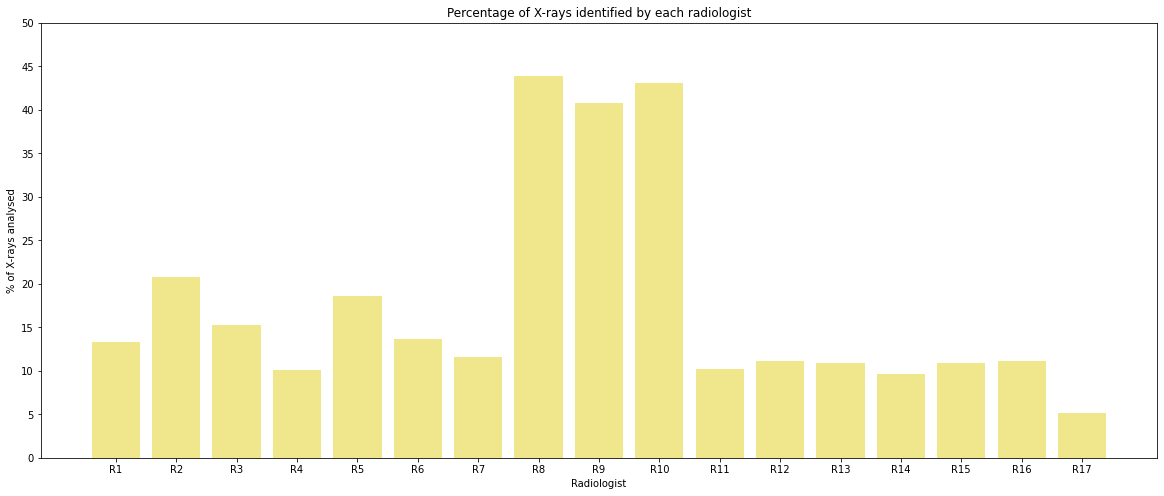

In [43]:
images_id = np.unique(df['image_id'])
df_radio = df[['image_id', 'rad_id']]
df_radio = df_radio.drop_duplicates()
identified_images = df_radio.groupby('rad_id')['image_id'].count()
identified_images_perc = identified_images*100/len(images_id)

fig, ax = plt.subplots(figsize=(20, 8))
ax.bar(natsorted(identified_images_perc.index), order_by_index(identified_images_perc, natsorted(identified_images_perc.index)), align='center', color='khaki')
ax.set_yticks(np.arange(0,55,5))
ax.set_xlabel('Radiologist')
ax.set_ylabel('% of X-rays analysed')
ax.set_title('Percentage of X-rays identified by each radiologist')
plt.show()

Still with the idea of having a robust model, out of the total number of diseases detected, each radiologist should have identified 100/17 = 5.88%.

In [44]:
ct = pd.crosstab(df['class_name'], df['rad_id'], dropna=False)
ct = ct[natsorted(ct.columns)]
for i in ct.index:
    ct.loc[i] = ct.loc[i]/ct.loc[i].sum()
    
ct.style.applymap(lambda x: '' if x<0.0588 else 'color : blue').format("{:.2%}")

### 3.6 Visualization of the diseases and their location <a class="anchor" id="36"></a>

#### 3.6.1 On different X-rays <a class="anchor" id="361"></a>

In [45]:
def plot_images(number, folder, category):
    
    category_images = os.path.join(folder, category) 
    
    for i in np.unique(df['class_name']):
        
        plt.figure(figsize=(20,80))
        
        for j in np.arange(0, number):
        
            df_classe = df[df['class_name'] == i]
            x = random.choices(df_classe.index, k=number)
            
            image_id = df_classe.loc[x[j],'image_id']+'.jpg'
            file_path = os.path.abspath(os.path.join(category_images, image_id))
            image = cv2.imread(file_path)
            
            plt.subplot(len(np.unique(df['class_name'])), number, j+1)
            plt.axis('off')
            plt.gca().set_title(i+'\n'+'('+image_id+')', loc='center', wrap=True)
            plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            ax = plt.gca()
            rect = Rectangle((df_classe.loc[x[j],'x_min'], df_classe.loc[x[j],'y_min']), 
                             (df_classe.loc[x[j],'x_max']-df_classe.loc[x[j],'x_min']),
                             (df_classe.loc[x[j],'y_max']-df_classe.loc[x[j],'y_min']), 
                             linewidth=1, edgecolor='r', facecolor='none')
            ax.add_patch(rect)
            
        plt.show()

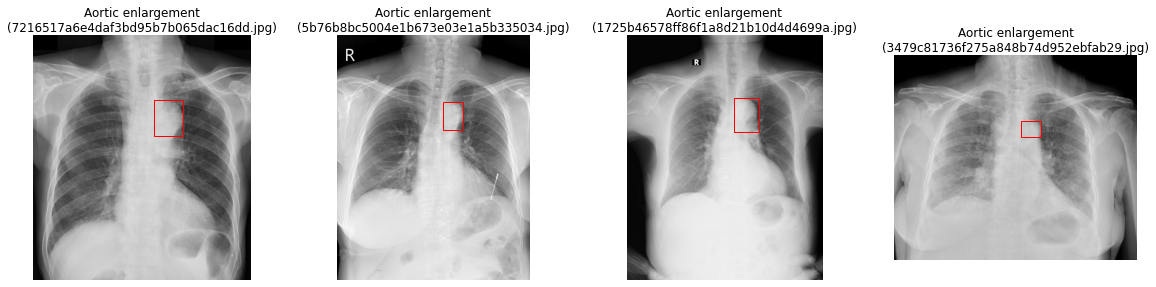

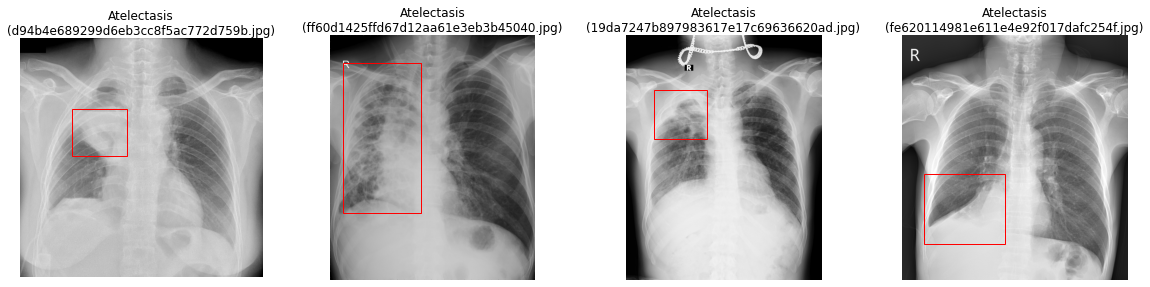

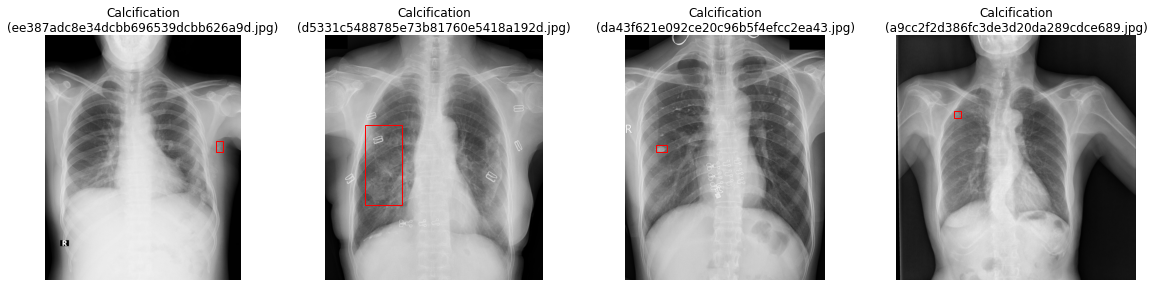

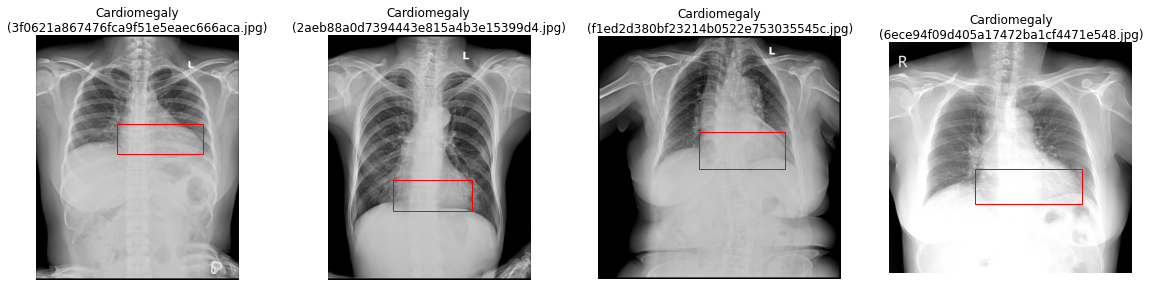

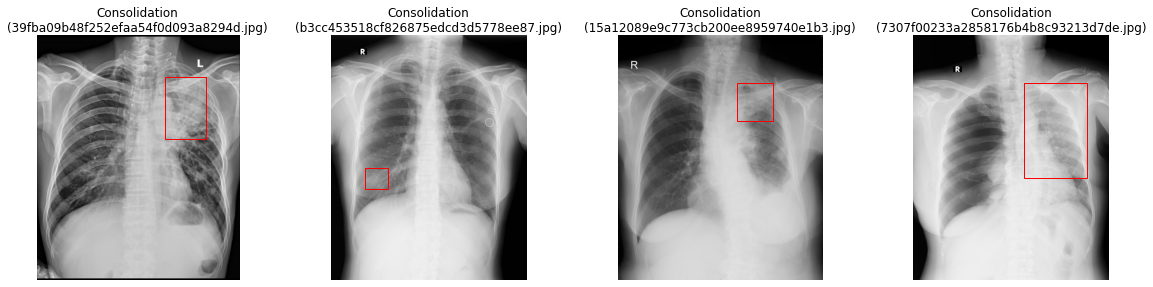

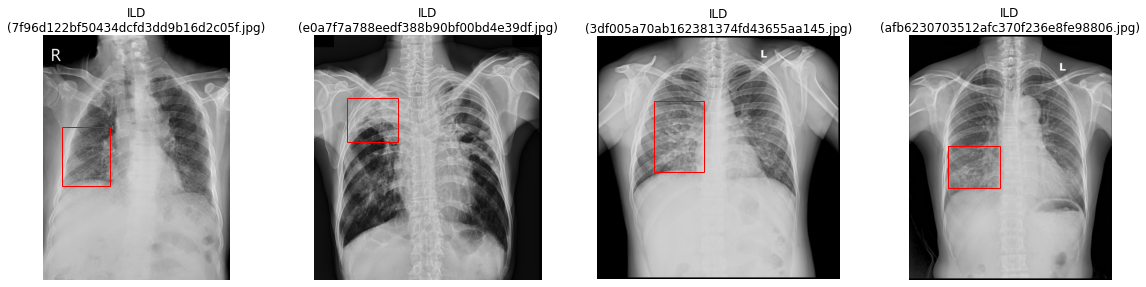

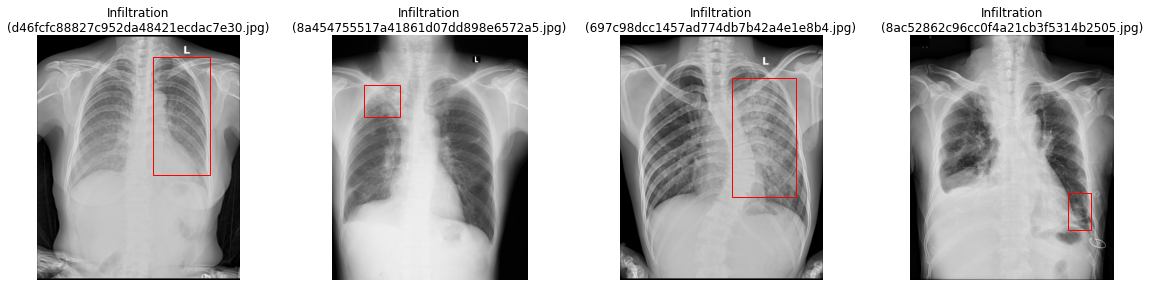

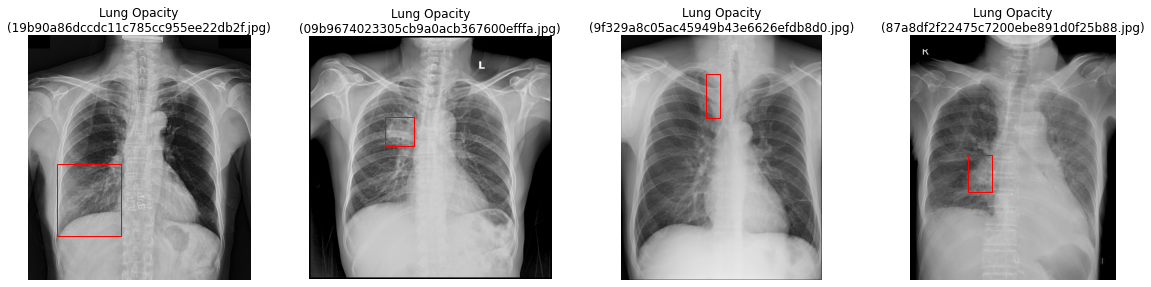

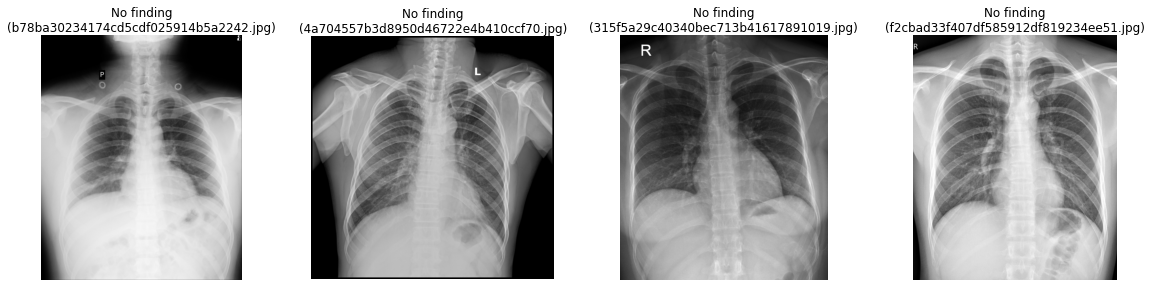

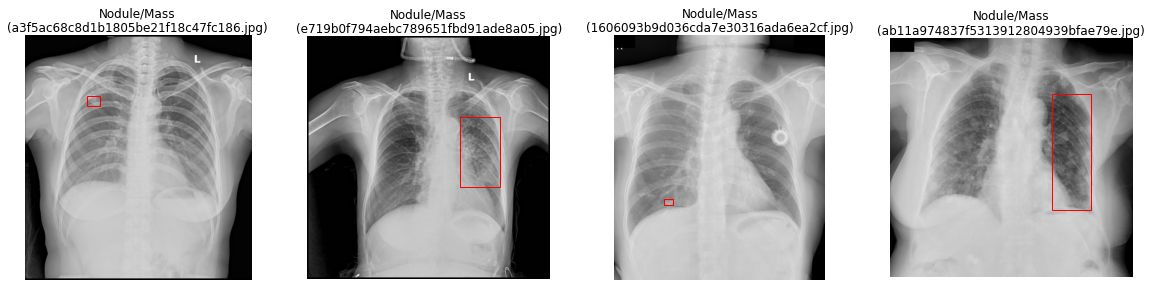

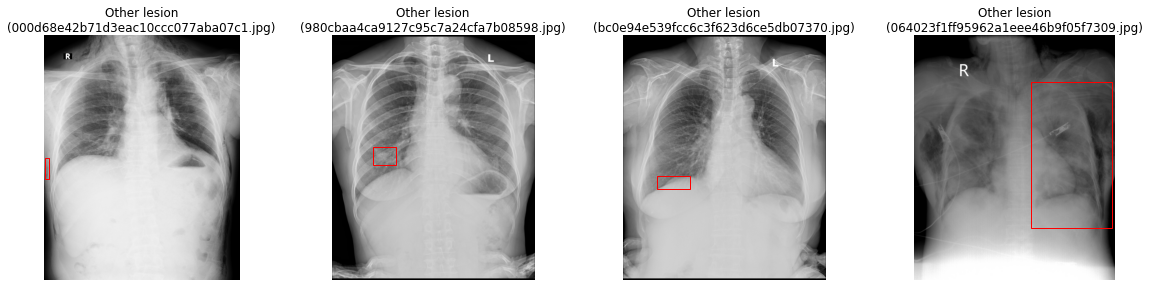

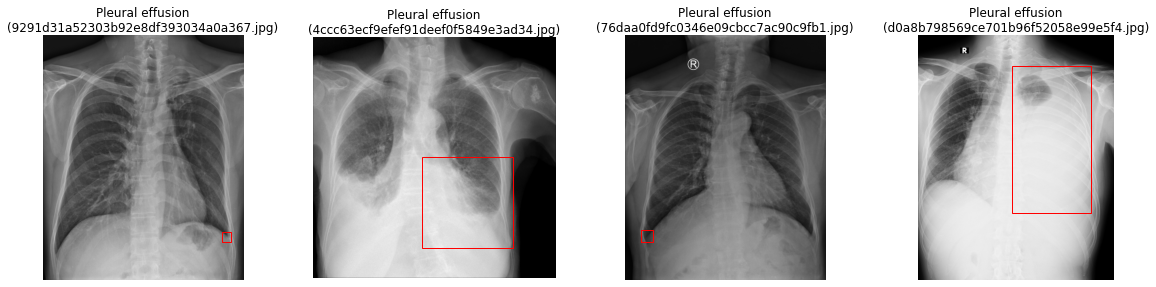

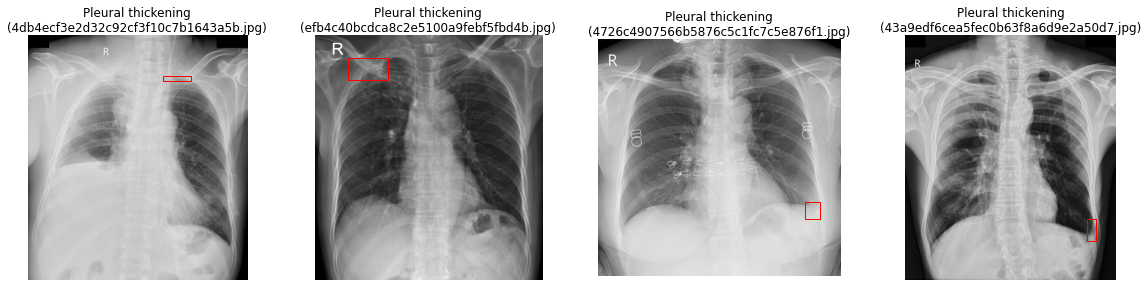

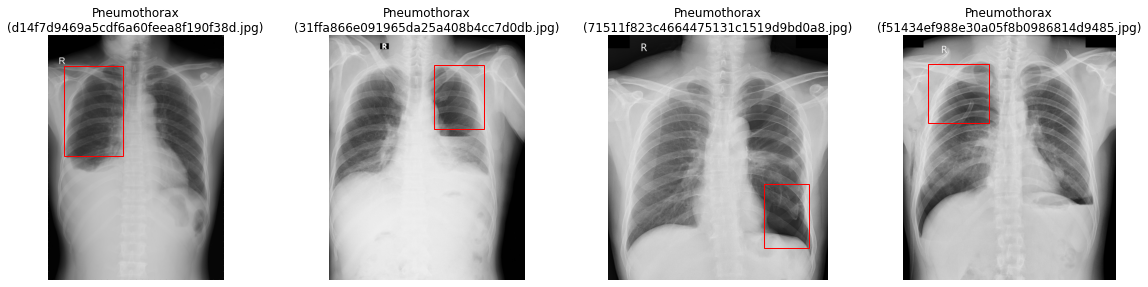

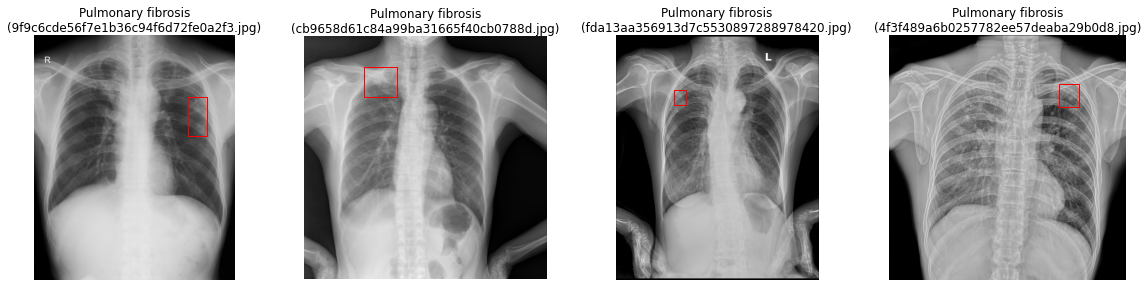

In [46]:
plot_images(4, 'vinbigdata', 'train')

#### 3.6.2 Overlaid in normalized graphics for each disease <a class="anchor" id="362"></a>

The centers of mass of each bounding box is plotted.

In [47]:
df_ratio = df

df_ratio['x_min_ratio'] = df_ratio['x_min']/df['width']
df_ratio['x_max_ratio'] = df_ratio['x_max']/df['width']
df_ratio['x_cm'] = (df_ratio['x_max_ratio']-df_ratio['x_min_ratio'])*0.5+df_ratio['x_min_ratio']

df_ratio['y_min_ratio'] = df_ratio['y_min']/df['height']
df_ratio['y_max_ratio'] = df_ratio['y_max']/df['height']
df_ratio['y_cm'] = (df_ratio['y_max_ratio']-df_ratio['y_min_ratio'])*0.5+df_ratio['y_min_ratio']

df_ratio['area'] = (df_ratio['x_max_ratio']-df_ratio['x_min_ratio'])*(df_ratio['y_max_ratio']-df_ratio['y_min_ratio'])
df_ratio['norme_cm'] = np.sqrt(df_ratio['x_cm'].pow(2)+df_ratio['y_cm'].pow(2))

df_ratio = df.fillna(-1)

In [48]:
%store df_ratio

Stored 'df_ratio' (DataFrame)


In [49]:
def plot_bounding_box(nbr_rectangle):

    fig = plt.figure(figsize=(25, 80))
    classes = np.unique(df_ratio['class_name'])
    classes = np.delete(classes, 8)
    k=0

    for i in classes:
        k=k+1
        ax = fig.add_subplot(7,2,k)
        index_class = df_ratio[df_ratio['class_name'] == i].index.values
        random.shuffle(index_class)

        ax.scatter(df_ratio[df_ratio['class_name'] == i]['x_cm'], df_ratio[df_ratio['class_name'] == i]['y_cm'], color='blue')
        ax.scatter(df_ratio.loc[index_class[:nbr_rectangle],'x_cm'], df_ratio.loc[index_class[:nbr_rectangle],'y_cm'], color='red')

        for j in index_class[:nbr_rectangle]:
            ax.add_patch(Rectangle(
                xy=(df_ratio.loc[j,'x_min_ratio'], df_ratio.loc[j,'y_min_ratio']), 
                width=(df_ratio.loc[j,'x_max_ratio']-df_ratio.loc[j,'x_min_ratio']), 
                height=(df_ratio.loc[j,'y_max_ratio']-df_ratio.loc[j,'y_min_ratio']),
                linewidth=1, color='red', fill=False))

        ax.set_title(i)   
        ax.set_xticks(np.arange(0.0,1.2,0.2))
        ax.set_yticks(np.arange(0.0,1.2,0.2))
        ax.set_xlim(0, 1)
        ax.set_ylim(1, 0)
        ax.set_xlabel('X-coordinate of the center of mass')
        ax.set_ylabel('Y-coordinate of the center of mass')
        ax.set_aspect('equal', adjustable='box')

    plt.show()

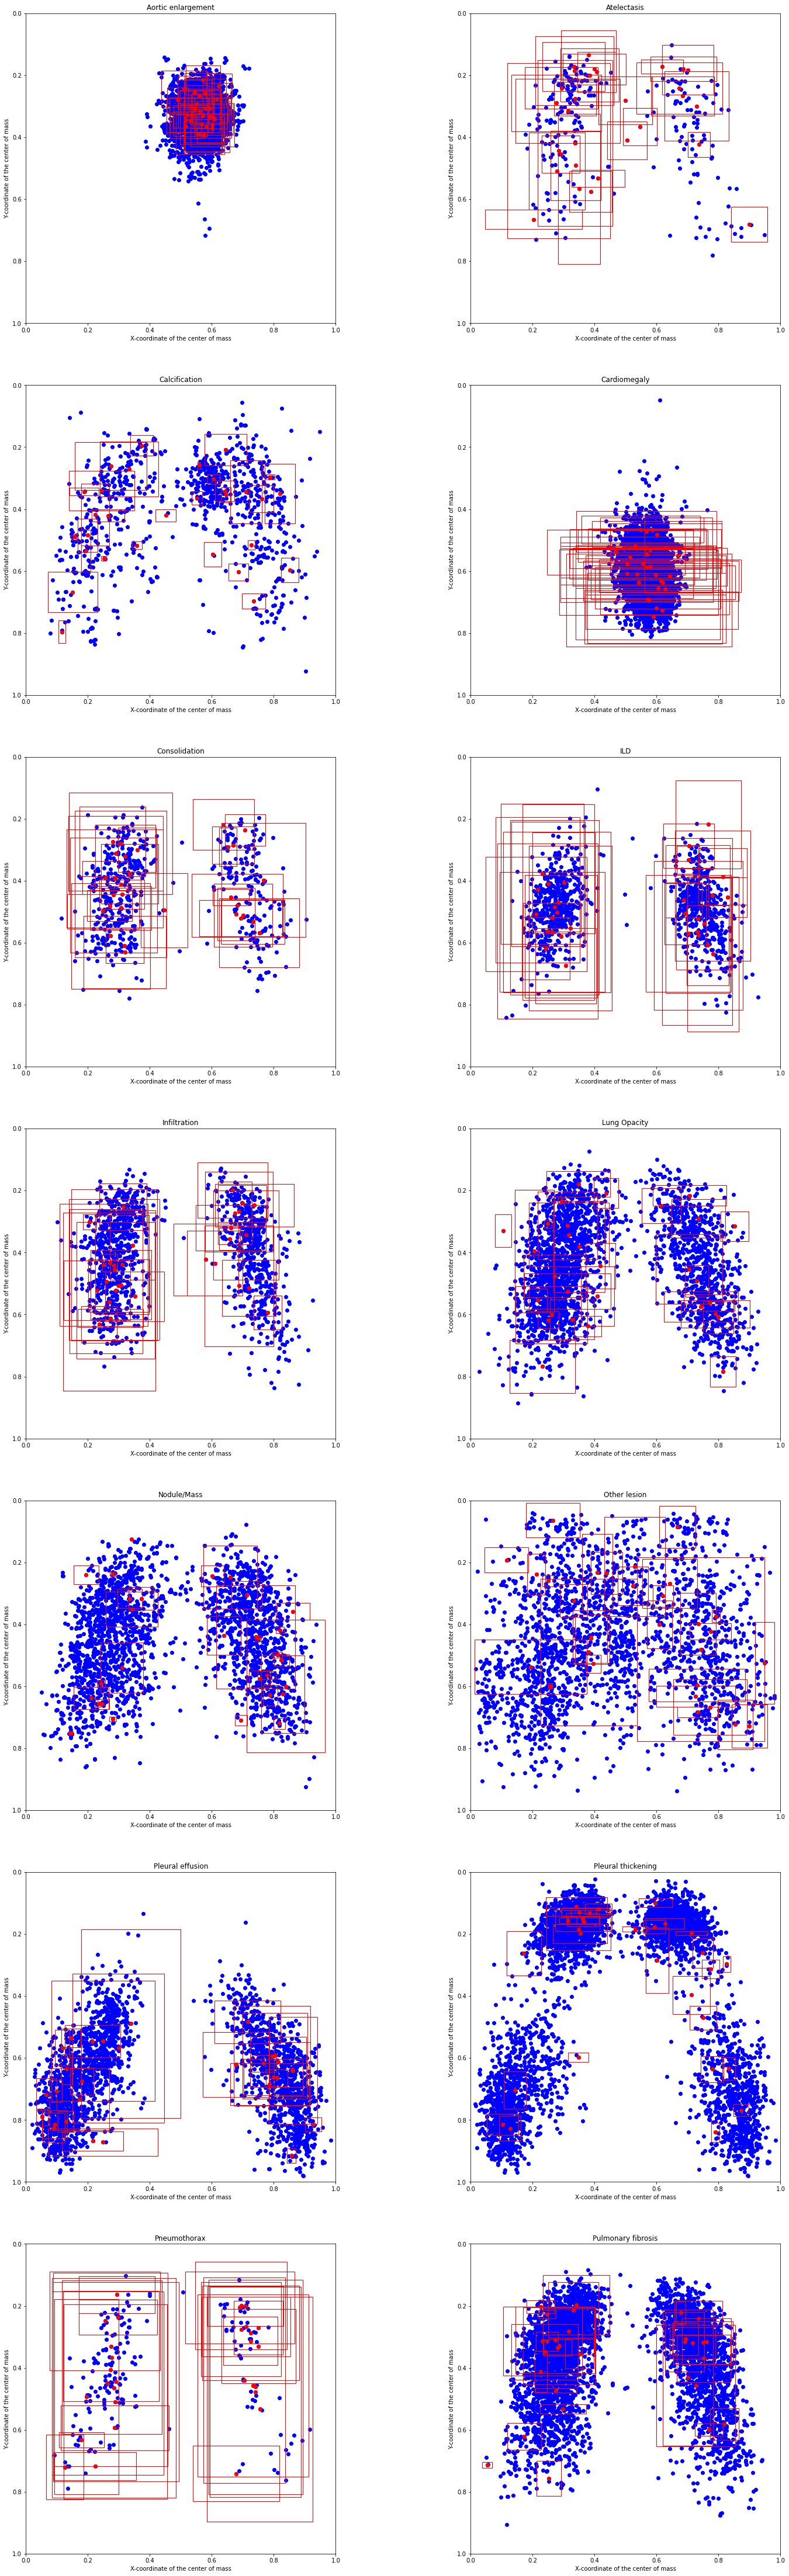

In [50]:
plot_bounding_box(30)

### 3.6.3 Locating all classes on a single normalized graph <a class="anchor" id="363"></a>

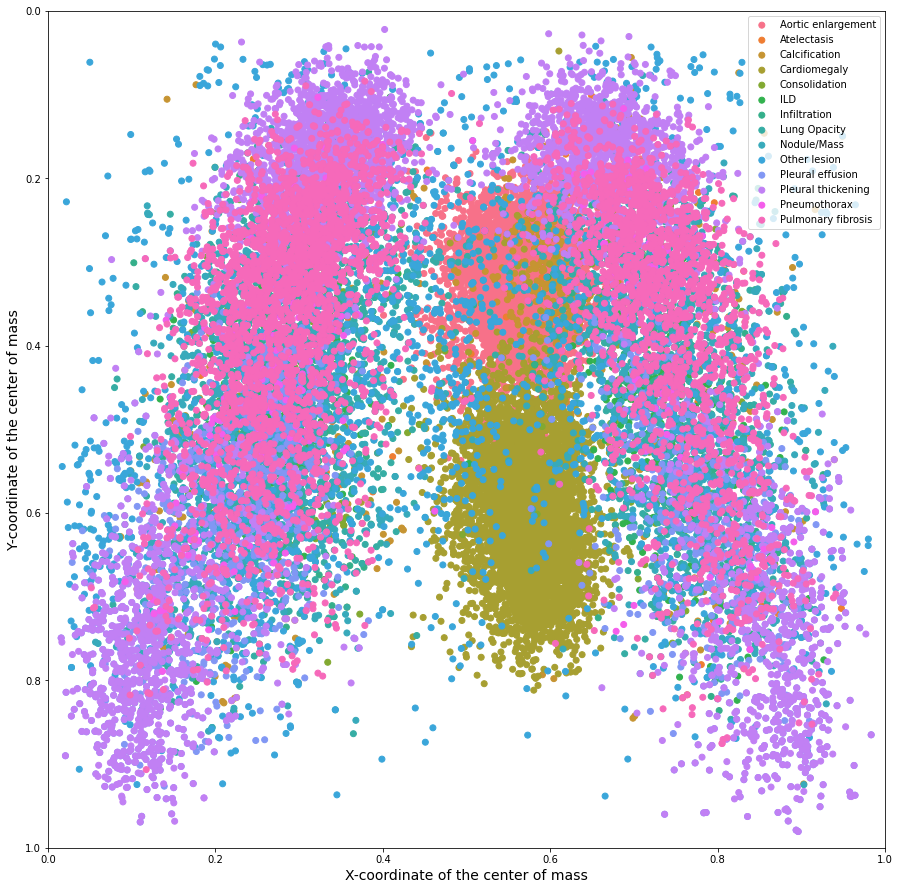

In [51]:
fig = plt.figure(figsize=(15, 30))
ax = fig.add_subplot(1, 1, 1)

classes = np.unique(df_ratio['class_name'])
classes = np.delete(classes, 8)

color_labels = classes
rgb_values = sns.color_palette('husl', len(color_labels))
color_map = dict(zip(color_labels, rgb_values))

for category in classes:   
    plt.scatter(df_ratio[df_ratio['class_name'] == category]['x_cm'], df_ratio[df_ratio['class_name'] == category]['y_cm'],
                c = df_ratio[df_ratio['class_name']== category]['class_name'].map(color_map),
                label = category) 
    
ax.set_aspect('equal', adjustable='box')
ax.set_xlim(0, 1)
ax.set_ylim(1, 0)
plt.legend()
plt.xlabel('X-coordinate of the center of mass', fontsize=14)
plt.ylabel('Y-coordinate of the center of mass', fontsize=14)
plt.show()

### 3.7 Concatenation of several image histograms for each class <a class="anchor" id="37"></a>

Two graphics are done. On the first one we superpose the histograms of images that contain the same disease. On the second one we superpose the histograms of the bounding boxes.

In [52]:
category_images = os.path.join('vinbigdata', 'train') 

def plot_histograms(k):
    
    fig = plt.figure(figsize=(20, 25))
    ax1 = fig.add_subplot(2, 1, 1)
    ax2 = fig.add_subplot(2, 1, 2)
    
    for i in np.unique(df['class_name']):

        image_size = 256
        superpose = np.zeros(image_size)
        superpose_masked = np.zeros(image_size)

        df_test = df_ratio[df_ratio['class_name'] == i]

        for index in random.choices(df_test.index, k=k):

            image_id = df_test.loc[index,'image_id']+'.jpg'
            file_path = os.path.abspath(os.path.join(category_images, image_id))
            image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
            
            x_min = int(df_test.loc[index,'x_min'])
            x_max = int(df_test.loc[index,'x_max'])
            y_min = int(df_test.loc[index,'y_min'])
            y_max = int(df_test.loc[index,'y_max'])
            
            mask = np.zeros(image.shape[:2], np.uint8)
            mask[y_min:y_max, x_min:x_max] = 255
            masked_image = cv2.bitwise_and(image, image, mask=mask)
            
            masked_image_resized = cv2.resize(masked_image, (256,256))
            masked_image_resized_flat = masked_image_resized.ravel()
            values_masked, counts_masked = np.unique(masked_image_resized_flat, return_counts=True)
            
            image_resized = cv2.resize(image, (image_size, image_size))
            image_resized_flat = image_resized.ravel()
            values, counts = np.unique(image_resized_flat, return_counts=True)
            
            dict_values_masked = {'index':np.arange(1,257,1),'values':values_masked}
            dict_counts_masked = {'index':values_masked,'counts': counts_masked}
            df_values_masked = pd.DataFrame.from_dict(dict_values_masked, orient='index')
            df_counts_masked = pd.DataFrame.from_dict(dict_counts_masked, orient='index')
            df_values_masked = df_values_masked.transpose()
            df_counts_masked = df_counts_masked.transpose()
            df_counts_values_masked = df_values_masked.set_index('index').join(df_counts_masked.set_index('index'))
            df_counts_values_masked = df_counts_values_masked.fillna(0)

            dict_values = {'index':np.arange(1,257,1),'values':values}
            dict_counts = {'index':values,'counts': counts}
            df_values = pd.DataFrame.from_dict(dict_values, orient='index')
            df_counts = pd.DataFrame.from_dict(dict_counts, orient='index')
            df_values = df_values.transpose()
            df_counts = df_counts.transpose()
            df_counts_values = df_values.set_index('index').join(df_counts.set_index('index'))
            df_counts_values = df_counts_values.fillna(0)

            superpose_masked += df_counts_values['counts']
            superpose += df_counts_values_masked['counts']

        ax1.plot(np.arange(1,257,1), superpose_masked, label=i)
        ax2.plot(np.arange(1,257,1), superpose, label=i)

    ax1.grid(axis='x')
    ax1.set_xticks(range(0,257,16))
    ax1.set_xlabel('Color')
    ax1.set_ylabel('Intensity [-]')
    ax1.legend(loc='upper right')
    
    ax2.grid(axis='x')
    ax2.set_xticks(range(0,257,16))
    ax2.set_xlabel('Color')
    ax2.set_ylabel('Intensity [-]')
    ax2.legend(loc='upper right')
    
    plt.show()

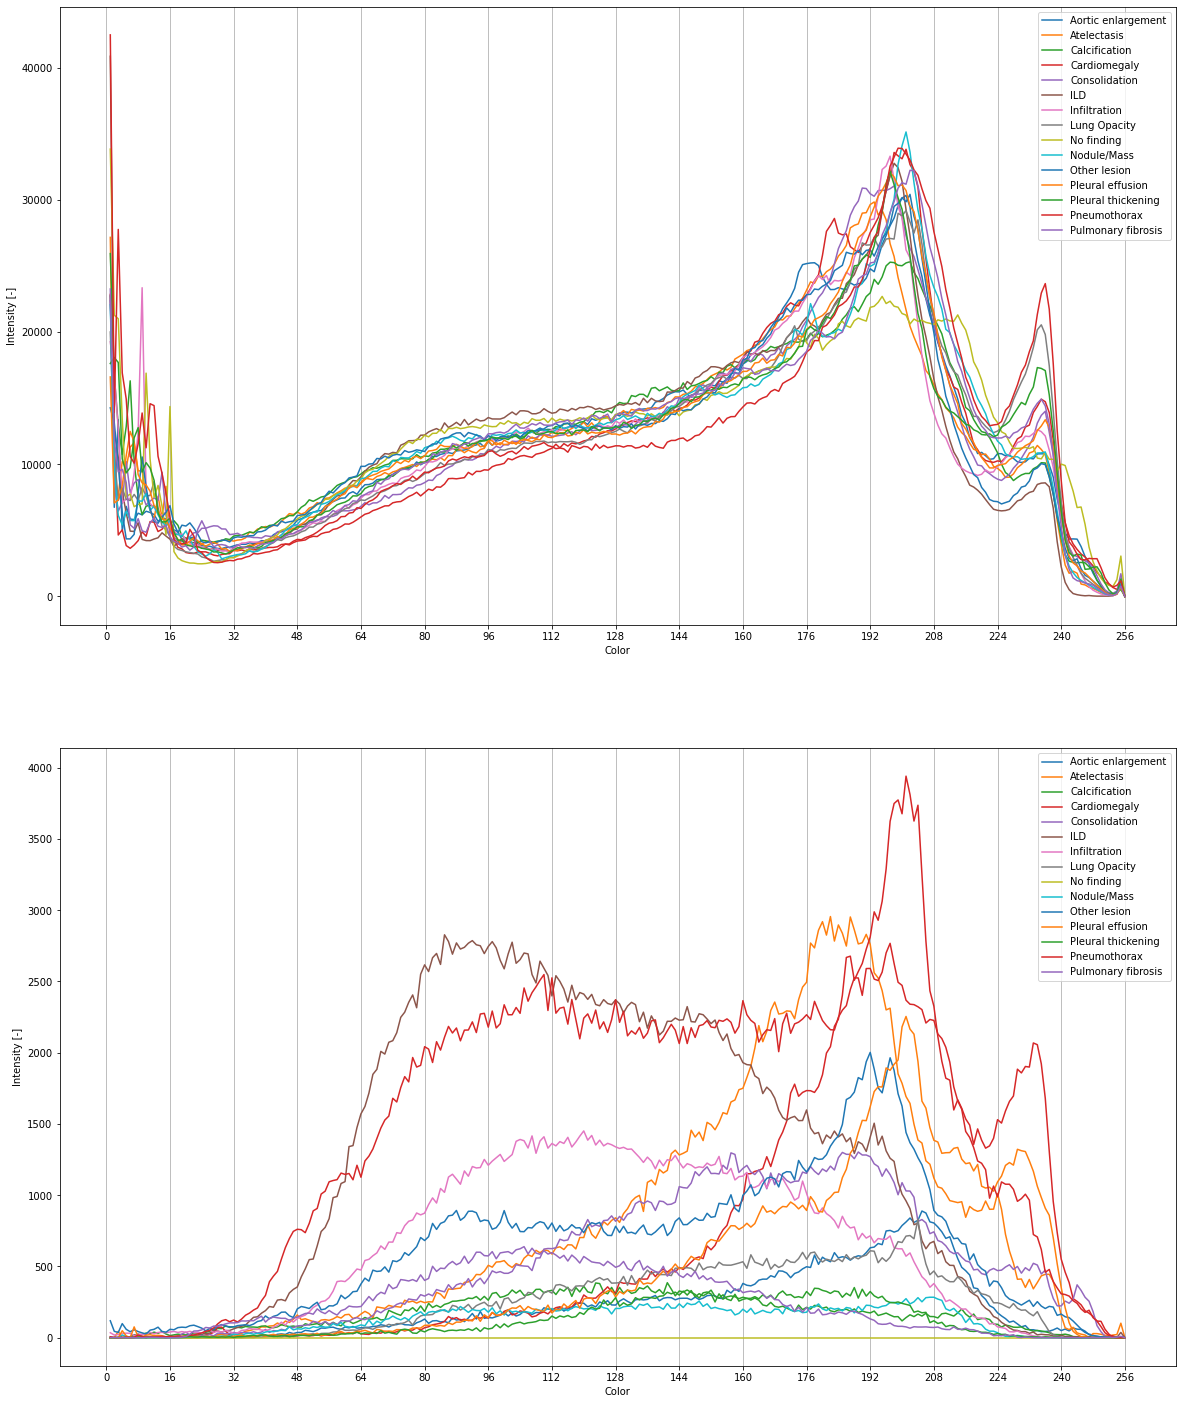

In [54]:
plot_histograms(50)

As expected, it is difficult to see a difference between the diseases on the first graph but not on the second one where different peaks can be seen.

## 4. Machine learning <a class="anchor" id="4"></a>

Two approaches were explored to get accurate diagnosis of a patient's health:

- To classify images to predict whether a patient is sick or healthy

- To detect which area is sick on the X-ray and by which disease

### 4.1 Image classification <a class="anchor" id="41"></a>

#### 4.1.1 Generation of sets and classes <a class="anchor" id="411"></a>

In [55]:
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg19 import preprocess_input
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

The main set has been divided in 3 subsets: 

- A testset with 250 images
- A validset with 30% of the total images minus the testset
- A trainset with 70% of the total images minus the testset

In [56]:
df_sick = df[df['class_name'] != 'No finding']
df_healthy = df[df['class_name'] == 'No finding']

images_sick = np.unique(df_sick['image_id'])
images_healthy = np.unique(df_healthy['image_id'])

In [57]:
source_images = os.path.join('vinbigdata', 'train')

train_images = os.path.join('data', 'Classification', 'train')
valid_images = os.path.join('data', 'Classification', 'valid')
test_images = os.path.join('data', 'Classification', 'test')

In [58]:
size_test = 250
size_valid = int(np.round(0.3*len(images_sick) - size_test))
size_train = int(len(images_sick) - size_test - size_valid)

For each set, the images are copied from the mainset in two different folders: sick and healthy.

In [87]:
for i in np.arange(0, size_train):

    images_sick_id = images_sick[i]+'.jpg'
    images_healthy_id = images_healthy[i]+'.jpg'

    file_path_sick = os.path.abspath(os.path.join(source_images, images_sick_id))
    file_path_healthy = os.path.abspath(os.path.join(source_images, images_healthy_id))

    shutil.copy(file_path_sick, os.path.join(train_images, 'sick'))
    shutil.copy(file_path_healthy, os.path.join(train_images, 'healthy'))
    
for i in np.arange(size_train, size_train+size_valid):

    images_sick_id = images_sick[i]+'.jpg'
    images_healthy_id = images_healthy[i]+'.jpg'

    file_path_sick = os.path.abspath(os.path.join(source_images, images_sick_id))
    file_path_healthy = os.path.abspath(os.path.join(source_images, images_healthy_id))

    shutil.copy(file_path_sick, os.path.join(valid_images, 'sick'))
    shutil.copy(file_path_healthy, os.path.join(valid_images, 'healthy'))
    
for i in np.arange(size_train+size_valid, size_train+size_valid+size_test):

    images_sick_id = images_sick[i]+'.jpg'
    images_healthy_id = images_healthy[i]+'.jpg'

    file_path_sick = os.path.abspath(os.path.join(source_images, images_sick_id))
    file_path_healthy = os.path.abspath(os.path.join(source_images, images_healthy_id))

    shutil.copy(file_path_sick, os.path.join(test_images, 'sick'))
    shutil.copy(file_path_healthy, os.path.join(test_images, 'healthy'))

#### 4.1.2 Images preprocessing <a class="anchor" id="412"></a>

In [59]:
image_generator = ImageDataGenerator(preprocessing_function=preprocess_input)
 
height = 299
width = 299
 
train = image_generator.flow_from_directory(
    os.path.join('data', 'Classification', 'train'),
    batch_size=32,
    target_size=(height, width),
    shuffle=False)
 
valid = image_generator.flow_from_directory(
    os.path.join('data', 'Classification', 'valid'),
    batch_size=32,
    target_size=(height, width),
    shuffle=False)

test = image_generator.flow_from_directory(
    os.path.join('data', 'Classification', 'test'),
    batch_size=32,
    target_size=(height, width),
    shuffle=False)
 
print(train.class_indices)

Found 6152 images belonging to 2 classes.
Found 2136 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
{'healthy': 0, 'sick': 1}


#### 4.1.3 Feature extraction <a class="anchor" id="413"></a>

The VGG19 convolutional neural network was chosen over the deeper Xception network as it provided better performance for this application.

In [60]:
vgg19_model = tf.keras.applications.VGG19(
                            include_top=False, weights='imagenet', input_tensor=None,
                            input_shape=None, pooling='avg', classes=1000,
                            classifier_activation='softmax')

trainset_feat = vgg19_model.predict(train)
np.savez('train.npz', category=train.labels, features=trainset_feat)

testset_feat = vgg19_model.predict(test)
np.savez('test.npz', category=test.labels, features=testset_feat)

validset_feat = vgg19_model.predict(valid)
np.savez('valid.npz', category=valid.labels, features=validset_feat)

print(trainset_feat.shape)
print(validset_feat.shape)
print(testset_feat.shape)

(6152, 512)
(2136, 512)
(500, 512)


#### 4.1.4 Logistic regression baseline <a class="anchor" id="414"></a>

In [61]:
with np.load('train.npz', allow_pickle=False) as npzfile:
    trainset = npzfile['features']
    label_trainset = npzfile['category']
    
with np.load('test.npz', allow_pickle=False) as npzfile:
    testset = npzfile['features']
    label_testset = npzfile['category']
      
with np.load('valid.npz', allow_pickle=False) as npzfile:
    validset = npzfile['features']
    label_validset = npzfile['category']
    
categories = [name for name in os.listdir(os.path.join('data', 'Classification', 'train')) if name != '.DS_Store']
dict_categories = { i : categories[i] for i in range(0, len(categories))}

In [62]:
mergeset = np.concatenate((trainset, validset))
label_mergeset = np.concatenate((label_trainset, label_validset))

The regularization strength parameter is optimised using a cross-validated grid-search.

In [65]:
pipe = Pipeline([
    ('logreg', LogisticRegression(multi_class='auto', solver='liblinear'))])

grid = {'logreg__C': np.logspace(-10, 10, num=50)}
grid_cv = GridSearchCV(pipe, grid, cv=5, return_train_score=True, n_jobs=4)

grid_cv.fit(mergeset, label_mergeset)

cv_results = pd.DataFrame(grid_cv.cv_results_)
cols = ['mean_test_score', 'std_test_score', 'mean_train_score', 'std_train_score', 'param_logreg__C']
cv_results[cols].sort_values('mean_test_score', ascending=False).head(5)

mean_test_score  std_test_score  mean_train_score  std_train_score  \
22         0.884169        0.002854          0.913308         0.002515   
21         0.883446        0.001584          0.909055         0.002153   
20         0.882842        0.003009          0.903264         0.002417   
23         0.881032        0.003294          0.914937         0.002040   
24         0.879343        0.003589          0.915571         0.002081   

   param_logreg__C  
22         0.09541  
21        0.037276  
20        0.014563  
23        0.244205  
24        0.625055

In [90]:
lr = grid_cv.score(testset, label_testset)

print('Test accuracy: {:.3f}'.format(grid_cv.score(testset, label_testset)))

Test accuracy: 0.886


#### 4.1.5 Nonlinear classifier - Support machine vector with radial basis funtion kernel <a class="anchor" id="415"></a>

The parameter C of the Radial Basis Function is changed from 1 to 200 to see the evolution of the model accuracy. The parameter gamma has been set to Auto.

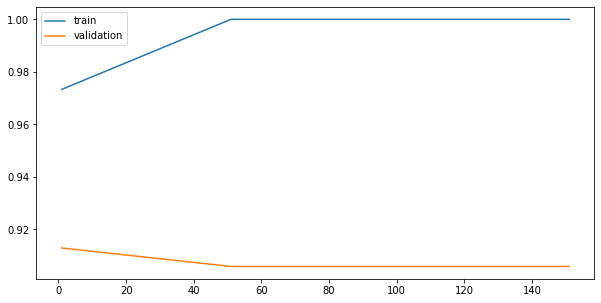

In [68]:
c_estimator = np.arange(1,200,50)
train_score = []
validation_score = []

for i in c_estimator:   
    rbf_svc = SVC(kernel='rbf', C=i, gamma='auto')
    rbf_svc.fit(trainset, label_trainset)                                                        
    train_score.append(rbf_svc.score(trainset, label_trainset))
    validation_score.append(rbf_svc.score(validset, label_validset))

plt.figure(figsize=(10,5))
plt.plot(c_estimator, train_score, label = 'train')
plt.plot(c_estimator, validation_score, label = 'validation')
plt.legend()
plt.show()

If we use one of the best C-values, we find that we can predict whether a patient is sick or not with fairly good accuracy.

In [69]:
best_estimator = c_estimator[np.argmax(validation_score)]
rbf_svc_best = SVC(kernel='rbf', C=best_estimator, gamma='auto')
rbf_svc_best.fit(trainset, label_trainset)

svm_rbf_result = 100*(rbf_svc_best.score(testset, label_testset))

smv = rbf_svc_best.score(testset, label_testset)
print('Test accuracy: {:.3f}'.format(smv))

Test accuracy: 0.912


#### 4.1.6 Nonlinear classifier - Random forest <a class="anchor" id="416"></a>

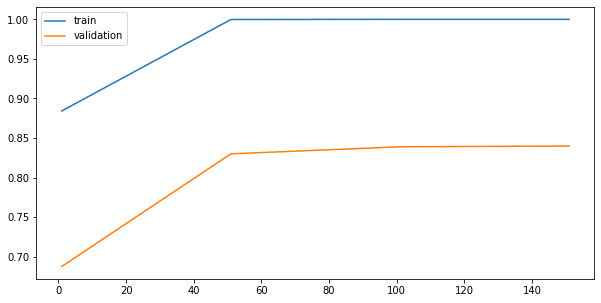

In [71]:
number_estimator = np.arange(1,200,50)                                             
train_score = []
validation_score = []

for i in number_estimator:
    rf = RandomForestClassifier(n_estimators=i, max_depth=None, random_state=0) 
    rf.fit(trainset, label_trainset)                                                        
    train_score.append(rf.score(trainset, label_trainset))
    validation_score.append(rf.score(validset, label_validset))

plt.figure(figsize=(10,5))
plt.plot(number_estimator, train_score, label = 'train')
plt.plot(number_estimator, validation_score, label = 'validation')
plt.legend()
plt.show()

In [72]:
best_estimator = number_estimator[np.argmax(validation_score)]
rf_best = RandomForestClassifier(n_estimators=best_estimator, max_depth=None, random_state=0)
rf_best.fit(trainset, label_trainset)

random_forest_result = 100*(rf_best.score(testset, label_testset))

rf = rf_best.score(testset, label_testset)
print('Test accuracy: {:.3f}'.format(rf))

Test accuracy: 0.876


#### 4.1.7 Model comparison <a class="anchor" id="417"></a>

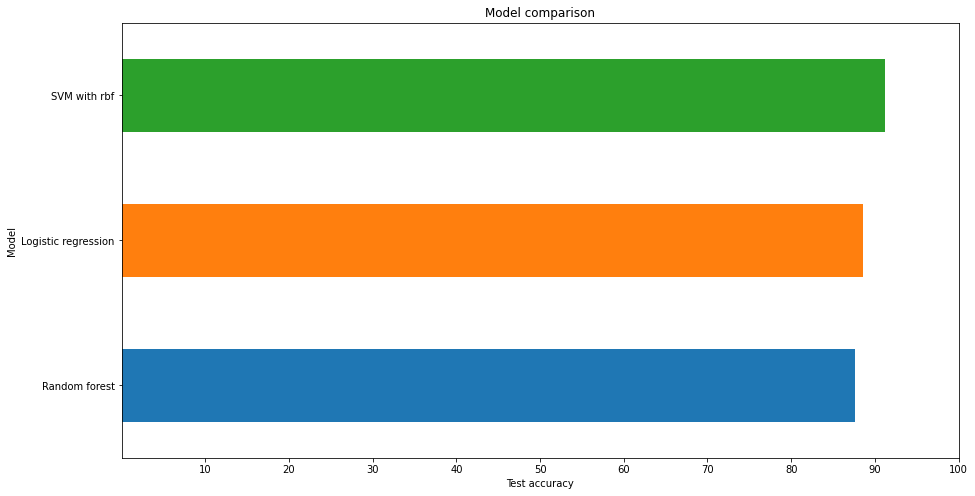

In [77]:
results = {'Model': ['Logistic regression', 'Random forest', 'SVM with rbf'], 
        'Test accuracy': [100*lr, 100*rf, 100*smv]}

df_results = pd.DataFrame.from_dict(results)

df_results = df_results.set_index('Model', inplace = False)
sort_df_results = df_results.sort_values('Test accuracy', ascending = True)
colormap = plt.cm.tab10(range(0, 4))
plt.figure(figsize=(15, 8))
plot = sort_df_results['Test accuracy'].plot.barh(title = 'Model comparison', color = colormap)
plot.set_xlabel('Test accuracy')
plot.set_ylabel('Model')
plt.xticks(np.arange(10, 110, 10))
plt.show()

### 4.2 Image detection <a class="anchor" id="42"></a>

#### 4.2.1 Data preparation <a class="anchor" id="421"></a>

As shown before each image is annotated by several radiologists who may have found different diseases with different locations.

In [78]:
df[df['image_id'] == df.loc[100,'image_id']]

image_id          class_name  class_id rad_id  \
100    2d063af5457785f5c76ae1e6c06c0037  Pleural thickening        11     R9   
1954   2d063af5457785f5c76ae1e6c06c0037  Pleural thickening        11     R9   
9520   2d063af5457785f5c76ae1e6c06c0037  Pulmonary fibrosis        13     R9   
15810  2d063af5457785f5c76ae1e6c06c0037    Pleural effusion        10    R10   
24703  2d063af5457785f5c76ae1e6c06c0037  Pulmonary fibrosis        13     R9   
25179  2d063af5457785f5c76ae1e6c06c0037  Pulmonary fibrosis        13     R8   
28013  2d063af5457785f5c76ae1e6c06c0037    Pleural effusion        10     R9   
29825  2d063af5457785f5c76ae1e6c06c0037  Pulmonary fibrosis        13     R8   
31198  2d063af5457785f5c76ae1e6c06c0037    Pleural effusion        10    R10   
31352  2d063af5457785f5c76ae1e6c06c0037  Pleural thickening        11     R9   
34654  2d063af5457785f5c76ae1e6c06c0037  Pleural thickening        11    R10   
45755  2d063af5457785f5c76ae1e6c06c0037    Pleural effusion        10     R9   
52423  2d063af5457785f5c76ae1e6c06c0037  Pleural thickening        11     R9   
55376  2d063af5457785f5c76ae1e6c06c0037  Pulmonary fibrosis        13    R10   
62762  2d063af5457785f5c76ae1e6c06c0037  Pleural thickening        11    R10   

        x_min   y_min   x_max   y_max  width  height  x_min_ratio  \
100    1144.0   338.0  1433.0   440.0   2048    2500     0.558594   
1954    159.0  2034.0   394.0  2335.0   2048    2500     0.077637   
9520    440.0   600.0   669.0   811.0   2048    2500     0.214844   
15810   151.0  2087.0   343.0  2339.0   2048    2500     0.073730   
24703  1490.0   671.0  1613.0   801.0   2048    2500     0.727539   
25179  1332.0   467.0  1609.0   786.0   2048    2500     0.650391   
28013   159.0  2034.0   394.0  2335.0   2048    2500     0.077637   
29825   476.0   581.0   699.0   962.0   2048    2500     0.232422   
31198  1790.0  2087.0  1919.0  2279.0   2048    2500     0.874023   
31352   648.0   343.0   849.0   405.0   2048    2500     0.316406   
34654   151.0  2087.0   343.0  2339.0   2048    2500     0.073730   
45755  1732.0  2002.0  1931.0  2342.0   2048    2500     0.845703   
52423  1732.0  2002.0  1931.0  2342.0   2048    2500     0.845703   
55376   440.0   524.0   747.0   937.0   2048    2500     0.214844   
62762  1790.0  2087.0  1919.0  2279.0   2048    2500     0.874023   

       x_max_ratio      x_cm  y_min_ratio  y_max_ratio    y_cm      area  \
100       0.699707  0.629150       0.1352       0.1760  0.1556  0.005757   
1954      0.192383  0.135010       0.8136       0.9340  0.8738  0.013815   
9520      0.326660  0.270752       0.2400       0.3244  0.2822  0.009437   
15810     0.167480  0.120605       0.8348       0.9356  0.8852  0.009450   
24703     0.787598  0.757568       0.2684       0.3204  0.2944  0.003123   
25179     0.785645  0.718018       0.1868       0.3144  0.2506  0.017258   
28013     0.192383  0.135010       0.8136       0.9340  0.8738  0.013815   
29825     0.341309  0.286865       0.2324       0.3848  0.3086  0.016594   
31198     0.937012  0.905518       0.8348       0.9116  0.8732  0.004837   
31352     0.414551  0.365479       0.1372       0.1620  0.1496  0.002434   
34654     0.167480  0.120605       0.8348       0.9356  0.8852  0.009450   
45755     0.942871  0.894287       0.8008       0.9368  0.8688  0.013215   
52423     0.942871  0.894287       0.8008       0.9368  0.8688  0.013215   
55376     0.364746  0.289795       0.2096       0.3748  0.2922  0.024764   
62762     0.937012  0.905518       0.8348       0.9116  0.8732  0.004837   

       norme_cm  
100    0.648106  
1954   0.884169  
9520   0.391080  
15810  0.893378  
24703  0.812761  
25179  0.760493  
28013  0.884169  
29825  0.421338  
31198  1.257951  
31352  0.394911  
34654  0.893378  
45755  1.246821  
52423  1.246821  
55376  0.411536  
62762  1.257951

A big challenge for the images detection was to be able to combine the analysis of all the radiologists for each image. Indeed, in the example above, we can see that the radiologists have detected the same diseases but with slightly different locations. This information must therefore be combined to avoid information redundancy that is detrimental to the learning of the model. 

A strategy equivalent to the one used in the algorithm Yolo has been used:

1. Check if the boxes overlap

2. Return the percentage of overlapping surfaces

3. Set a minimum value on the percentage for which we will combine the boxes

4. Combine the boxes by means of their coordinates

#### 4.2.1.1 Functions for combining different image boxes <a class="anchor" id="4211"></a>

- Function to check if 2 boxes ovelap

In [79]:
def bbox_overlap_index(index1, index2, dataframe, axis):
      
    x1 = dataframe.loc[index1, axis+'_min']
    x2 = dataframe.loc[index1, axis+'_max']
    x3 = dataframe.loc[index2, axis+'_min']
    x4 = dataframe.loc[index2, axis+'_max']
 
    if x3 < x1:
        if x4 < x1:
            return 0
        else:
            return min(x2,x4) - x1
    else:
        if x2 < x3:
             return 0
        else:
            return min(x2,x4) - x3

- Function to calculate the percentage of overlapping surfaces

In [80]:
def bbox_compare(combination, dataframe):
   
    index1, index2 = combination
   
    intersect_w = bbox_overlap_index(index1, index2, dataframe, 'x')
    intersect_h = bbox_overlap_index(index1, index2, dataframe, 'y')
    intersect = intersect_w * intersect_h
 
    w1 = dataframe.loc[index1, 'x_max']-dataframe.loc[index1, 'x_min']
    h1 = dataframe.loc[index1, 'y_max']-dataframe.loc[index1, 'y_min']
    w2 = dataframe.loc[index2, 'x_max']-dataframe.loc[index2, 'x_min']
    h2 = dataframe.loc[index2, 'y_max']-dataframe.loc[index2, 'y_min']
    
    union = w1*h1 + w2*h2 - intersect
   
    return float(intersect) / union

- Function to combine boxes if the percentage of overlapping surfaces is greater than or egal to a threshold

In [81]:
def combine_bbox(image_id, level):
   
    df_fill = df.copy()
    keep_columns = ['image_id', 'class_id', 'class_name', 'x_min', 'y_min', 'x_max', 'y_max', 'width', 'height']
    diseases = np.unique(df_fill['class_name'])
 
    df_image = df_fill[df_fill['image_id'] == image_id][keep_columns]
 
    sum_combi = 1.0
    while sum_combi > 0:
        sum_combi = 0
       
        for disease in diseases:
 
                    index_mean = []
                    index_alone = []
                    index = df_image[df_image['class_name'] == disease].index
 
                    if len(index) > 1:
 
                        combi_index = list(itertools.combinations(index, 2))
 
                        for i in np.arange(len(combi_index)):
 
                            combi = bbox_compare(combi_index[i], df_fill)
 
                            if combi >= level:
                                index_mean.append(combi_index[i])
                                sum_combi = np.append(sum_combi, combi).sum()
 
                            elif combi < level:
                                index_alone.append(combi_index[i])
 
                    for i in np.arange(len(index_mean)):
                       
                        df_image.loc[index_mean[i], 'x_min'] = np.mean(df_fill.loc[index_mean[i], 'x_min'])
                        df_image.loc[index_mean[i], 'x_max'] = np.mean(df_fill.loc[index_mean[i], 'x_max'])
                        df_image.loc[index_mean[i], 'y_min'] = np.mean(df_fill.loc[index_mean[i], 'y_min'])
                        df_image.loc[index_mean[i], 'y_max'] = np.mean(df_fill.loc[index_mean[i], 'y_max'])
 
        df_image = df_image.drop_duplicates(subset=['x_min', 'y_min', 'x_max', 'y_max'])
       
    return df_image

#### 4.2.1.2 Concatenation and normalisation of all boxes in each image into new dataframes. <a class="anchor" id="4212"></a>

In [158]:
df_combine_box = pd.DataFrame(index=df.index, columns=['image_id', 'class_id', 'class_name', 'x_min', 'y_min', 'x_max', 'y_max', 'width', 'height'])
 
for i in np.unique(df['image_id']):
    df_image = combine_bbox(i, 0.4)
    indexes = df_image.index
    df_combine_box.loc[indexes, :] = df_image.loc[indexes, :]

df_combine_box.dropna(subset = ['image_id'], inplace=True)
df_combine_box.reset_index(drop=True, inplace=True)   
df_combine_box.to_pickle('./df_combine_box.pkl')

In [82]:
df_combine_box = pd.read_pickle("./df_combine_box.pkl")
df_combine_box

image_id class_id          class_name   x_min  \
0      50a418190bc3fb1ef1633bf9678929b3       14          No finding     NaN   
1      21a10246a5ec7af151081d0cd6d65dc9       14          No finding     NaN   
2      9a5094b2563a1ef3ff50dc5c7ff71345        3        Cardiomegaly   691.5   
3      051132a778e61a86eb147c7c6f564dfe        0  Aortic enlargement  1284.5   
4      063319de25ce7edb9b1c6b8881290140       14          No finding     NaN   
...                                 ...      ...                 ...     ...   
31224  cf32a2bc41deeb7436a36bcc4ff324fb        0  Aortic enlargement  1496.0   
31225  a8db71e482a4dc2e83a1f5eecd9568cc        9        Other lesion  1450.0   
31226  5bc0153d83e1514ca428123b264a3aa8       11  Pleural thickening   546.0   
31227  66332eb5425bcdc6854aae970cc656b9        8         Nodule/Mass  2161.0   
31228  3b887c0550e9722c9b86b7c22ad09e11        9        Other lesion   254.0   

        y_min   x_max   y_max width height  
0         NaN     NaN     NaN  2332   2580  
1         NaN     NaN     NaN  2954   3159  
2      1375.0  1655.0  1815.0  2080   2336  
3       737.0  1612.0  1042.5  2304   2880  
4         NaN     NaN     NaN  2540   3072  
...       ...     ...     ...   ...    ...  
31224   977.0  2072.0  1244.0  3000   3000  
31225   614.0  1504.0  1012.0  2703   3333  
31226   492.0   851.0   563.0  2304   2880  
31227  1600.0  2308.0  1758.0  2936   2963  
31228  1959.0   280.0  1990.0  2630   3073  

[31229 rows x 9 columns]

For the Yolo algorithms, the values for each box must be normalized.

In [83]:
def normalize_bbox(dataframe):
 
    df_ratio = dataframe.copy()
 
    df_ratio['x_min'] = dataframe['x_min']/dataframe['width']
    df_ratio['x_max'] = dataframe['x_max']/dataframe['width']
    df_ratio['x_cm'] = (df_ratio['x_max']-df_ratio['x_min'])*0.5+df_ratio['x_min']
 
    df_ratio['y_min'] = dataframe['y_min']/dataframe['height']
    df_ratio['y_max'] = dataframe['y_max']/dataframe['height']
    df_ratio['y_cm'] = (df_ratio['y_max']-df_ratio['y_min'])*0.5+df_ratio['y_min']
   
    df_ratio.drop(columns=['width', 'height'], inplace=True)
    df_ratio.dropna(subset = ['image_id'], inplace=True)
    df_ratio.reset_index(drop=True, inplace=True)
   
        
    bounding_box = {'image': df_ratio['image_id'],
                'id': df_ratio['class_id'],
                'center_x': df_ratio['x_cm'],
                'center_y': df_ratio['y_cm'],
                'width': df_ratio['x_max']-df_ratio['x_min'],
                'height': df_ratio['y_max']-df_ratio['y_min']}
   
    df_bounding_box = pd.DataFrame(data=bounding_box)
 
    return df_bounding_box

In [84]:
df_combine_box_norm = normalize_bbox(df_combine_box)
df_combine_box_norm

image  id  center_x  center_y     width  \
0      50a418190bc3fb1ef1633bf9678929b3  14       NaN       NaN       NaN   
1      21a10246a5ec7af151081d0cd6d65dc9  14       NaN       NaN       NaN   
2      9a5094b2563a1ef3ff50dc5c7ff71345   3  0.564062  0.682791  0.463221   
3      051132a778e61a86eb147c7c6f564dfe   0  0.628581  0.308941  0.142144   
4      063319de25ce7edb9b1c6b8881290140  14       NaN       NaN       NaN   
...                                 ...  ..       ...       ...       ...   
31224  cf32a2bc41deeb7436a36bcc4ff324fb   0  0.594667  0.370167     0.192   
31225  a8db71e482a4dc2e83a1f5eecd9568cc   9   0.54643  0.243924  0.019978   
31226  5bc0153d83e1514ca428123b264a3aa8  11  0.303168   0.18316  0.132378   
31227  66332eb5425bcdc6854aae970cc656b9   8  0.761069  0.566655  0.050068   
31228  3b887c0550e9722c9b86b7c22ad09e11   9  0.101521  0.642532  0.009886   

         height  
0           NaN  
1           NaN  
2      0.188356  
3      0.106076  
4           NaN  
...         ...  
31224     0.089  
31225  0.119412  
31226  0.024653  
31227  0.053324  
31228  0.010088  

[31229 rows x 6 columns]

In [85]:
df_no_14 = df_combine_box_norm[df_combine_box_norm['id'] != 14]
no_14 = len(np.unique(df_no_14['image']))

df_only_14 = df_combine_box_norm[df_combine_box_norm['id'] == 14]
only_14 = len(np.unique(df_only_14['image']))

index_14 = df_combine_box_norm[df_combine_box_norm['id'] == 14].index

df_combine_box_norm.drop(index_14[:(only_14-no_14)], inplace=True)

#### 4.2.1.3 Example of the processing applied to an image <a class="anchor" id="4213"></a>

In [86]:
def compare_image_bbox(number):

    image = df[df['class_name'] != 'No finding'].index[number]
    
    df_image_old = df[df['image_id'] == df.loc[image,'image_id']]
    df_image_new = df_combine_box[df_combine_box['image_id'] == df.loc[image,'image_id']]
    index_image_old = df_image_old.index
    index_image_new = df_image_new.index

    path_images = os.path.join('vinbigdata', 'train')
    image_id = df_image_old.loc[index_image_old[0],'image_id']+'.jpg'
    file_path = os.path.abspath(os.path.join(path_images, image_id))
    image = cv2.imread(file_path)

    plt.figure(figsize=(25,30))
    plt.subplot(1, 2, 1)
    plt.axis('off')
    plt.gca().set_title(image_id, loc='center', wrap=True)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax = plt.gca()
    for i in index_image_old:

        rect = Rectangle((df_image_old.loc[i,'x_min'], df_image_old.loc[i,'y_min']), 
                         (df_image_old.loc[i,'x_max']-df_image_old.loc[i,'x_min']),
                         (df_image_old.loc[i,'y_max']-df_image_old.loc[i,'y_min']), 
                          linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

        label = '%s' % (df_image_old.loc[i,'class_name'])
        y1, x1 = df_image_old.loc[i,'y_min'], df_image_old.loc[i,'x_min']
        plt.text(x1, y1, label, color='red', fontsize=10.0)

    plt.subplot(1, 2, 2)
    plt.axis('off')
    plt.gca().set_title(image_id, loc='center', wrap=True)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax = plt.gca()
    for i in index_image_new:  
        rect = Rectangle((df_image_new.loc[i,'x_min'], df_image_new.loc[i,'y_min']), 
                         (df_image_new.loc[i,'x_max']-df_image_new.loc[i,'x_min']),
                         (df_image_new.loc[i,'y_max']-df_image_new.loc[i,'y_min']), 
                          linewidth=1, edgecolor='b', facecolor='none')
        ax.add_patch(rect)

        label = '%s' % (df_image_new.loc[i,'class_name'])
        y1, x1 = df_image_new.loc[i,'y_min'], df_image_new.loc[i,'x_min']
        plt.text(x1, y1, label, color='blue', fontsize=10.0)

    plt.show()

In red the raw data and in blue the processed data.

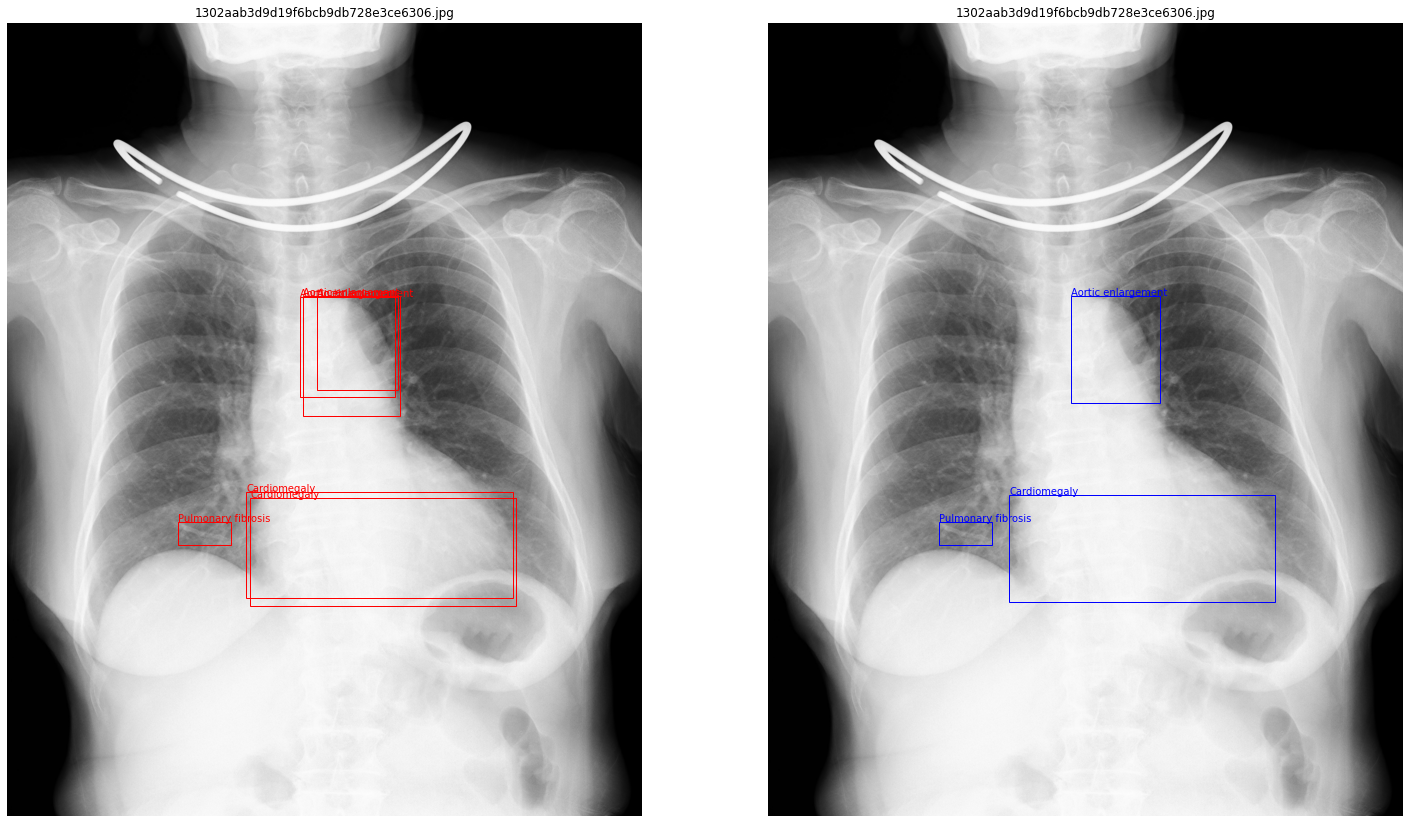

In [87]:
compare_image_bbox(100)

#### 4.2.2 Processing of the training and validation dataset <a class="anchor" id="422"></a>

The dataset were divided into a training and a validation dataset. The division was made so that each disease is present for 30% in the validation dataset and 70% in the training test. The aim is that each disease should be present with an equivalent ratio so that the algorithm can be trained as well as possible.

In [88]:
ratio = 0.7
train = []
valid = []
k=0

for class_id in np.unique(df_combine_box_norm['id']):
    
    index = df_combine_box_norm[df_combine_box_norm['id'] == class_id].index
    
    for j in index:
        k = k+1
        if k <= 10*ratio:
            train.append(df_combine_box_norm.loc[j, 'image'])
        elif k > 10*ratio and k <= 10:
            valid.append(df_combine_box_norm.loc[j, 'image'])
            if k == 10:
                k = 0

    train = list(dict.fromkeys(train))
    valid = list(dict.fromkeys(valid))

    train_set = set(train)
    valid_set = set(valid)

    intersection = train_set.intersection(valid_set)

    j=0    
    for i in intersection:  
        j=j+1
        if j <= int(ratio*len(intersection)):
            valid.remove(i)
        else:
            train.remove(i)

#### 4.2.3 Saving TXT files <a class="anchor" id="423"></a>

The algorithm Yolo requires several files in order to be trained:

- A TXT file containing the link to the training data

- A TXT file containing the link to the validation data

- A folder where for each image, we have a TXT file with the information on the detected objects respecting the syntax [OBJECT-CLASS / X_CENTER / Y_CENTER / WIDTH / HEIGHT]

#### 4.2.3.1 Images with non-labeled objects <a class="anchor" id="4231"></a>

The training dataset should include negative samples without bounding box. We must have the same % of empty images as images with objects. Here the class 14 will be the negative samples.

In [89]:
df_combine_box_norm.replace({'id':14},'', inplace = True)
df_combine_box_norm.reset_index(inplace=True, drop=True)
df_combine_box_norm

image  id  center_x  center_y     width  \
0      9a5094b2563a1ef3ff50dc5c7ff71345   3  0.564062  0.682791  0.463221   
1      051132a778e61a86eb147c7c6f564dfe   0  0.628581  0.308941  0.142144   
2      1c32170b4af4ce1a3030eb8167753b06  11  0.309843  0.128581  0.125984   
3      0c7a38f293d5f5e4846aa4ca6db4daf1   5  0.773523  0.472407  0.368053   
4      47ed17dcb2cbeec15182ed335a8b5a9e   8  0.238512  0.720698  0.048287   
...                                 ...  ..       ...       ...       ...   
25012  cf32a2bc41deeb7436a36bcc4ff324fb   0  0.594667  0.370167     0.192   
25013  a8db71e482a4dc2e83a1f5eecd9568cc   9   0.54643  0.243924  0.019978   
25014  5bc0153d83e1514ca428123b264a3aa8  11  0.303168   0.18316  0.132378   
25015  66332eb5425bcdc6854aae970cc656b9   8  0.761069  0.566655  0.050068   
25016  3b887c0550e9722c9b86b7c22ad09e11   9  0.101521  0.642532  0.009886   

         height  
0      0.188356  
1      0.106076  
2       0.02474  
3      0.753033  
4      0.040561  
...         ...  
25012     0.089  
25013  0.119412  
25014  0.024653  
25015  0.053324  
25016  0.010088  

[25017 rows x 6 columns]

#### 4.2.3.2 Training and validation TXT files <a class="anchor" id="4232"></a>

In [165]:
save_path = os.path.join('data', 'images')
extension = '.jpg'

train_images = [save_path+'/'+x+extension for x in train]
valid_images = [save_path+'/'+x+extension for x in valid]

df_train = pd.DataFrame(data=train_images)
df_valid = pd.DataFrame(data=valid_images)

df_train.to_csv(os.path.join('data','train.txt'), index=False, header=False)  
df_valid.to_csv(os.path.join('data','val.txt'), index=False, header=False) 

#### 4.2.3.3 TXT file for each image <a class="anchor" id="4233"></a>

In [166]:
images = np.unique(df_combine_box_norm['image'])

for image in images:

    df_bbox = df_combine_box_norm[df_combine_box_norm['image'] == image]
    df_bbox = df_bbox.drop(columns = 'image')
    df_bbox[df_bbox.columns[1:]] = df_bbox[df_bbox.columns[1:]].astype(float).round(decimals=5)

    image_txt = image+'.txt'
    df_bbox.to_csv(os.path.join('data', 'labels', image_txt), index=False, header=False, sep=' ')  

#### 4.2.3.4 TXT files for Yolo V5 <a class="anchor" id="4234"></a>

In [167]:
train_yolov5_images = os.path.join('yolov5', 'data', 'images', 'train')
valid_yolov5_images = os.path.join('yolov5', 'data', 'images', 'valid')

train_yolov5_labels = os.path.join('yolov5', 'data', 'labels', 'train')
valid_yolov5_labels = os.path.join('yolov5', 'data', 'labels', 'valid')

In [168]:
source_images = os.path.join('vinbigdata', 'train')

for i in train:
    image = i+'.jpg'
    image_source = os.path.join('vinbigdata', 'train', image)
    image_destination = os.path.join(train_yolov5_images, image)
    shutil.copy(image_source, image_destination)
    
    label = i+'.txt'
    label_source = os.path.join('data', 'labels', label)
    label_destination = os.path.join(train_yolov5_labels, label)
    shutil.copy(label_source, label_destination)
    
for i in valid:
    image = i+'.jpg'
    image_source = os.path.join('vinbigdata', 'train', image)
    image_destination = os.path.join(valid_yolov5_images, image)
    shutil.copy(image_source, image_destination)
    
    label = i+'.txt'
    label_source = os.path.join('data', 'labels', label)
    label_destination = os.path.join(valid_yolov5_labels, label)
    shutil.copy(label_source, label_destination)

#### 4.2.3.5 Resizing images <a class="anchor" id="4235"></a>

In [ ]:
path = os.path.join('yolov5', 'data', 'images', 'valid')
dirs = os.listdir(path) 

In [ ]:
for i in dirs:
    if i == '.DS_Store':
        continue
        
    elif i == '.ipynb_checkpoints':
        continue
    
    else:
        image = Image.open(path+'/'+i)
        file_path, extension = os.path.splitext(path+'/'+i)
        size = image.size

        new_image_height = 416
        new_image_width = int(size[1] / size[0] * new_image_height)

        image = image.resize((new_image_height, new_image_width), Image.ANTIALIAS)
        image.save(file_path + extension, 'JPEG', quality=95)

### 4.3 Training YoloV5 on Google Colab <a class="anchor" id="43"></a>

In [2]:
from IPython import display

#### 4.3.1 Modification of the YAML files <a class="anchor" id="431"></a>
To train the algorithm to detect diseases, some parameters must be adapted for our problem. In the dataset.yaml and custom_cfg.yaml files, the following change has been made:

- train: ./data/images/train/

- val: ./data/images/valid/

- nc: 14

- names: ['Aortic enlargement', 'Atelectasis', 'Calcification', 'Cardiomegaly', 'Consolidation', 'ILD', 'Infiltration', 'Lung Opacity', 'Nodule/Mass', 'Other lesion', 'Pleural effusion', 'Pleural thickening', 'Pneumothorax', 'Pulmonary fibrosis']


#### 4.3.2 Commands for training the algorithm <a class="anchor" id="432"></a>

The algorithm has been train with 50 epochs and a batch size of 16.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
!7z x drive/MyDrive/yolov5.zip

/bin/sh: 7z: command not found


In [ ]:
%cd /content/yolov5

In [ ]:
!pip install -r requirements.txt

In [ ]:
!python train.py --img 416 --batch 16 --epochs 50 --data './dataset.yaml' --cfg './custom_cfg.yaml' --weights yolov5s.pt

#### 4.3.3 Results <a class="anchor" id="433"></a>

- Confusion matrix

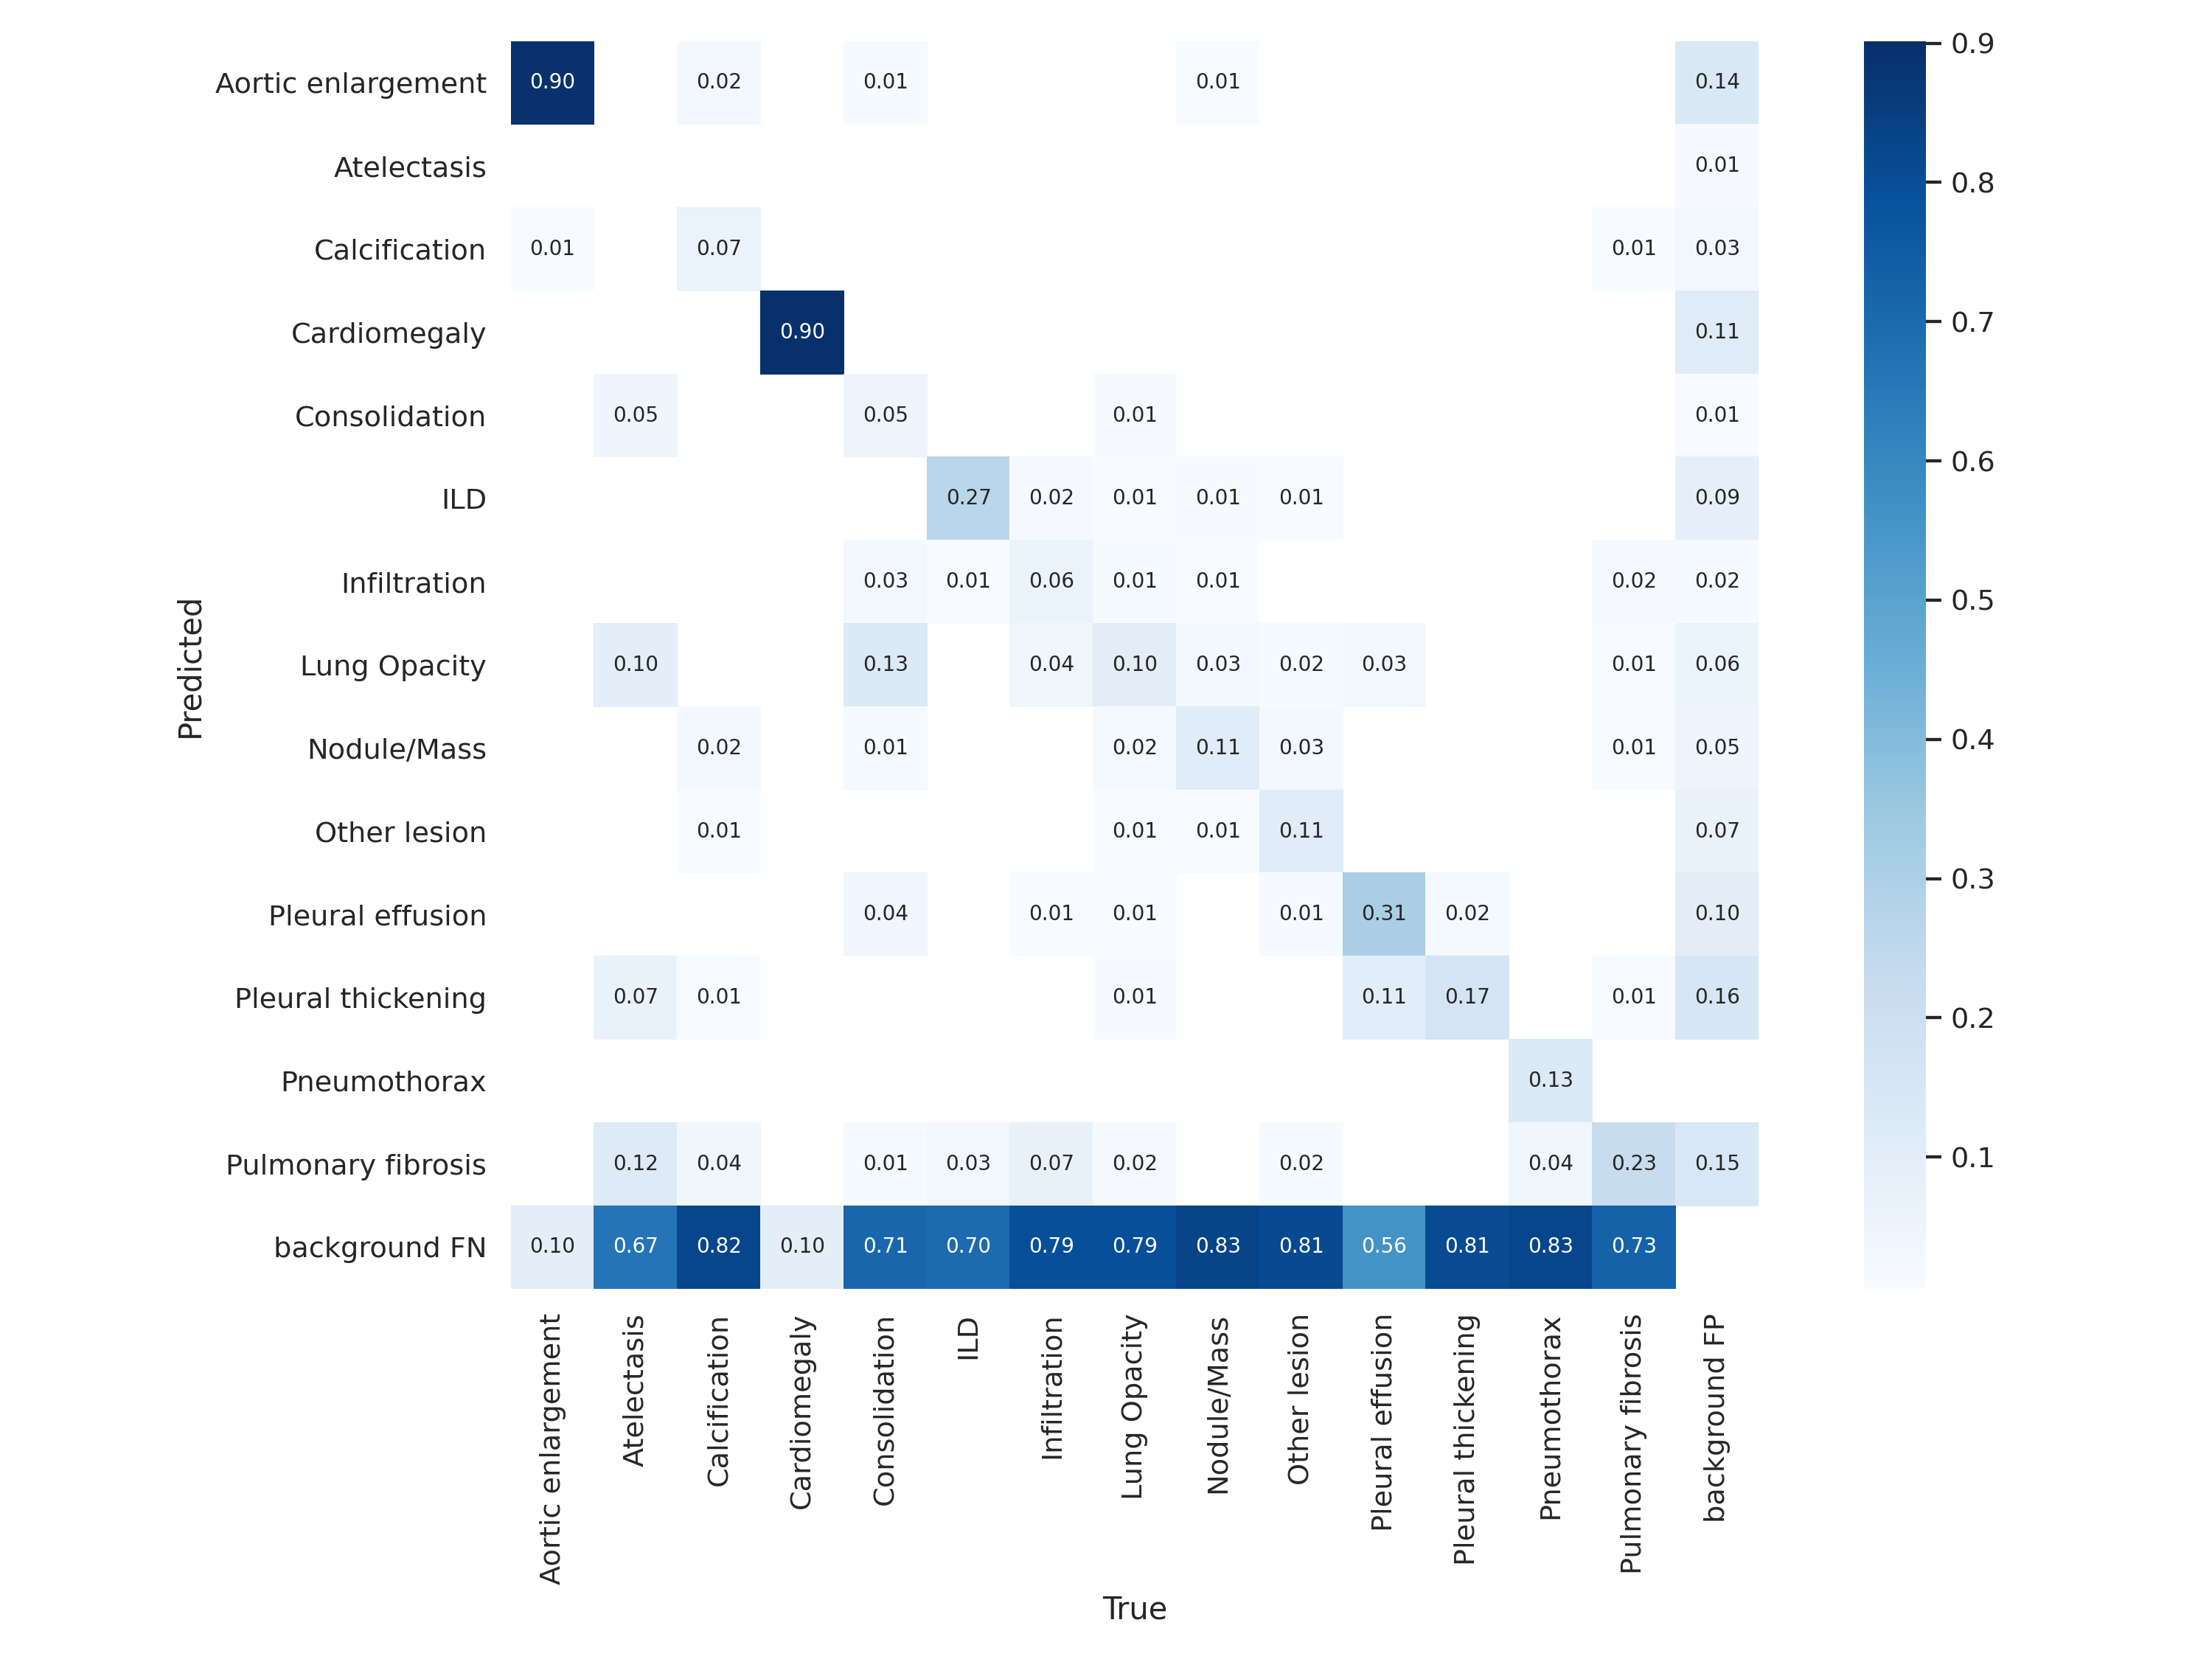

In [3]:
display.Image("./confusion_matrix.png")

- Model accuracy

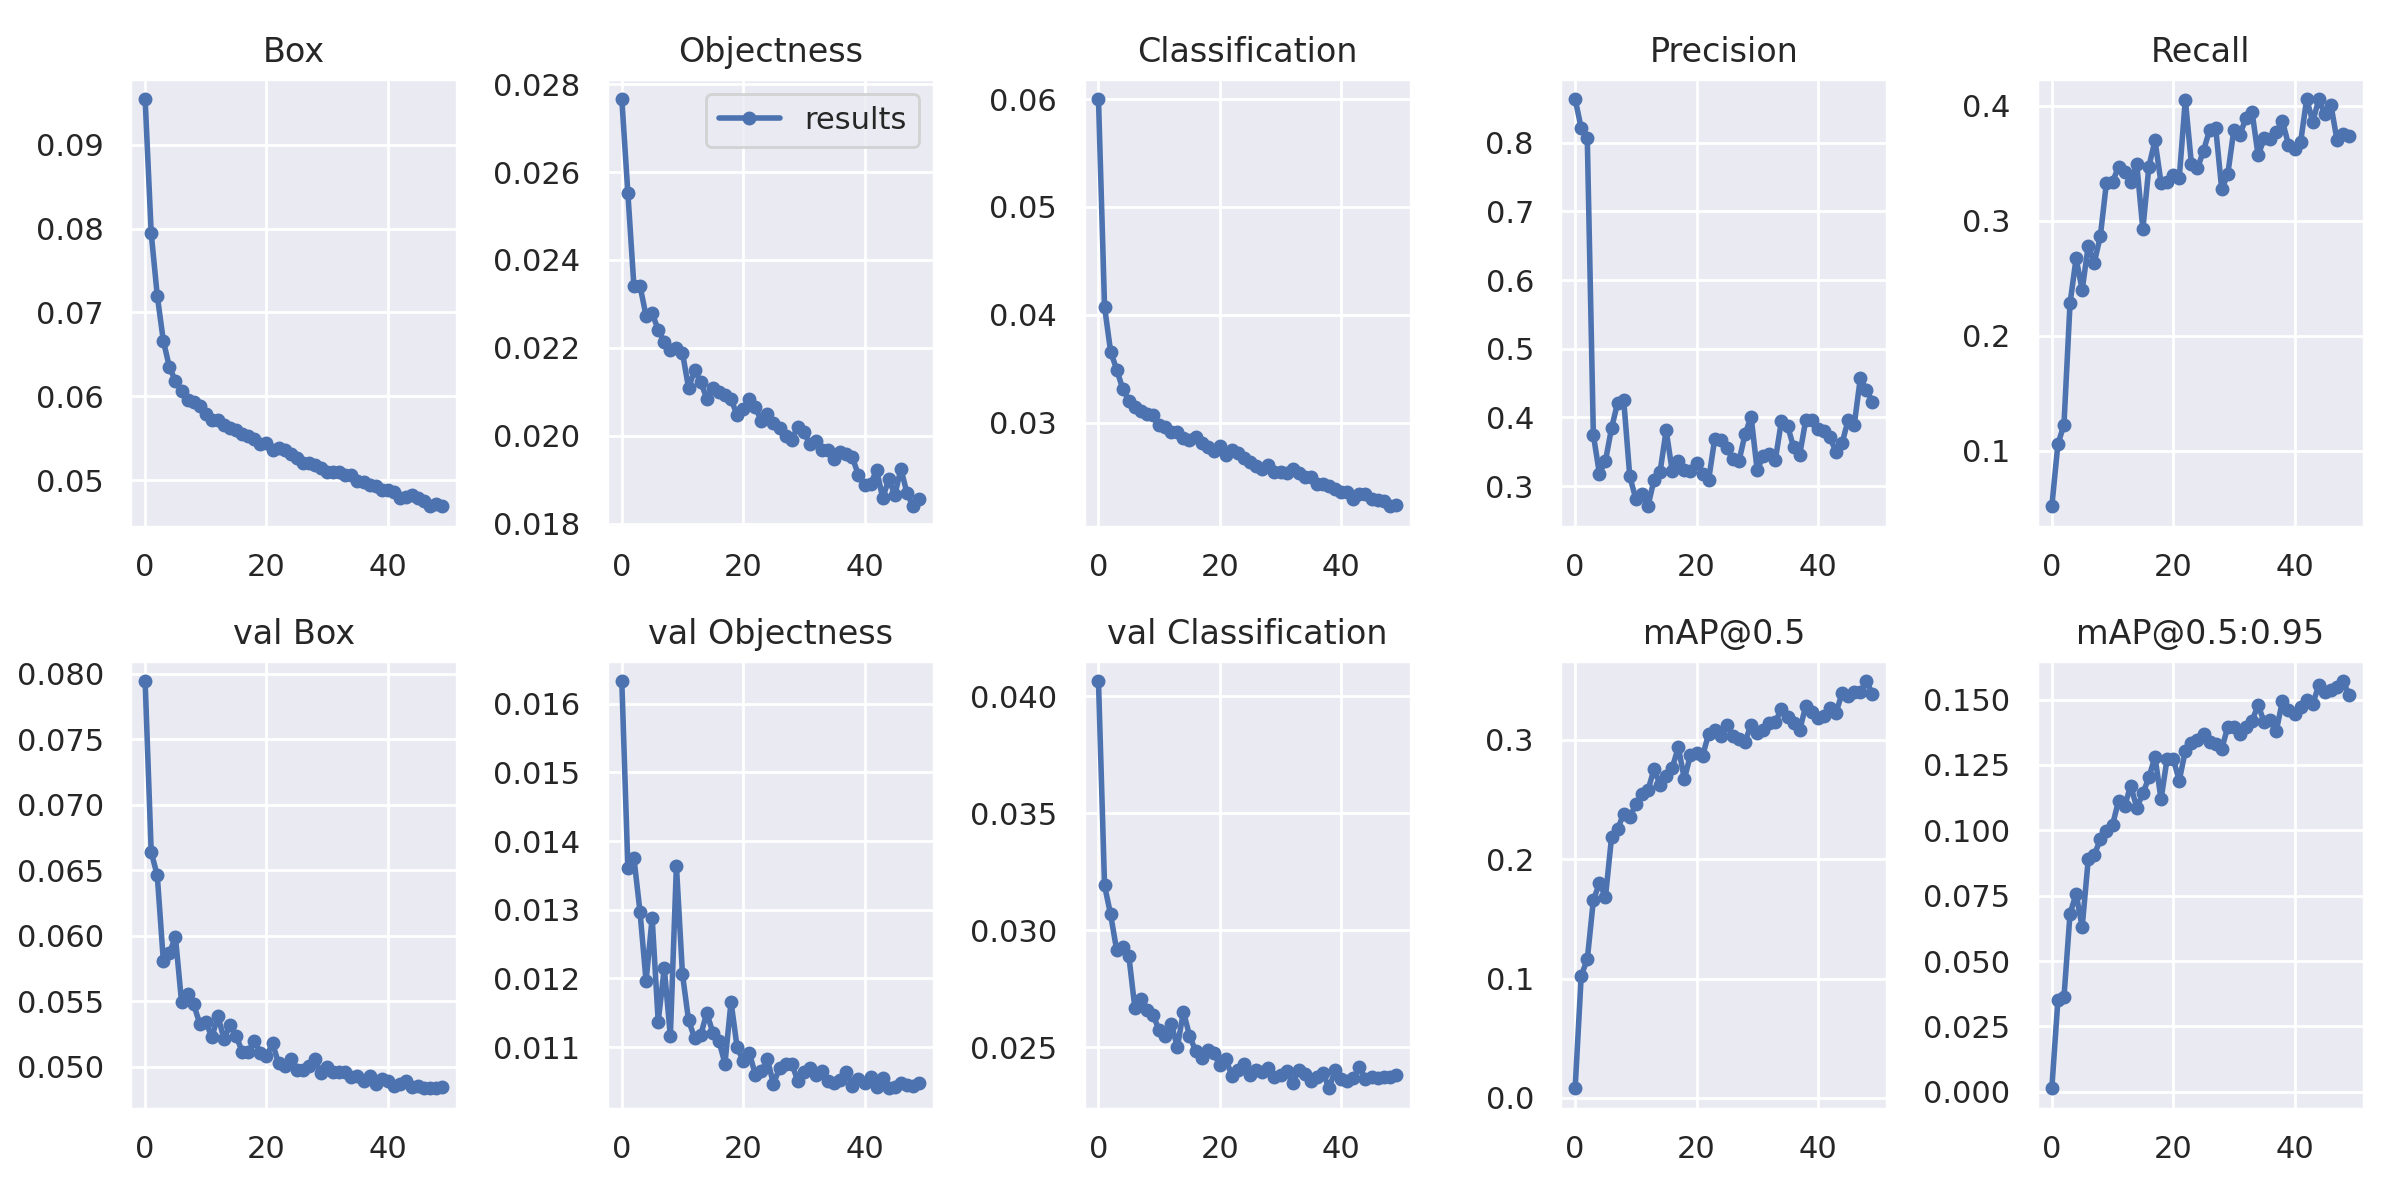

In [4]:
display.Image("./results.png")

- Disease detection on x-rays

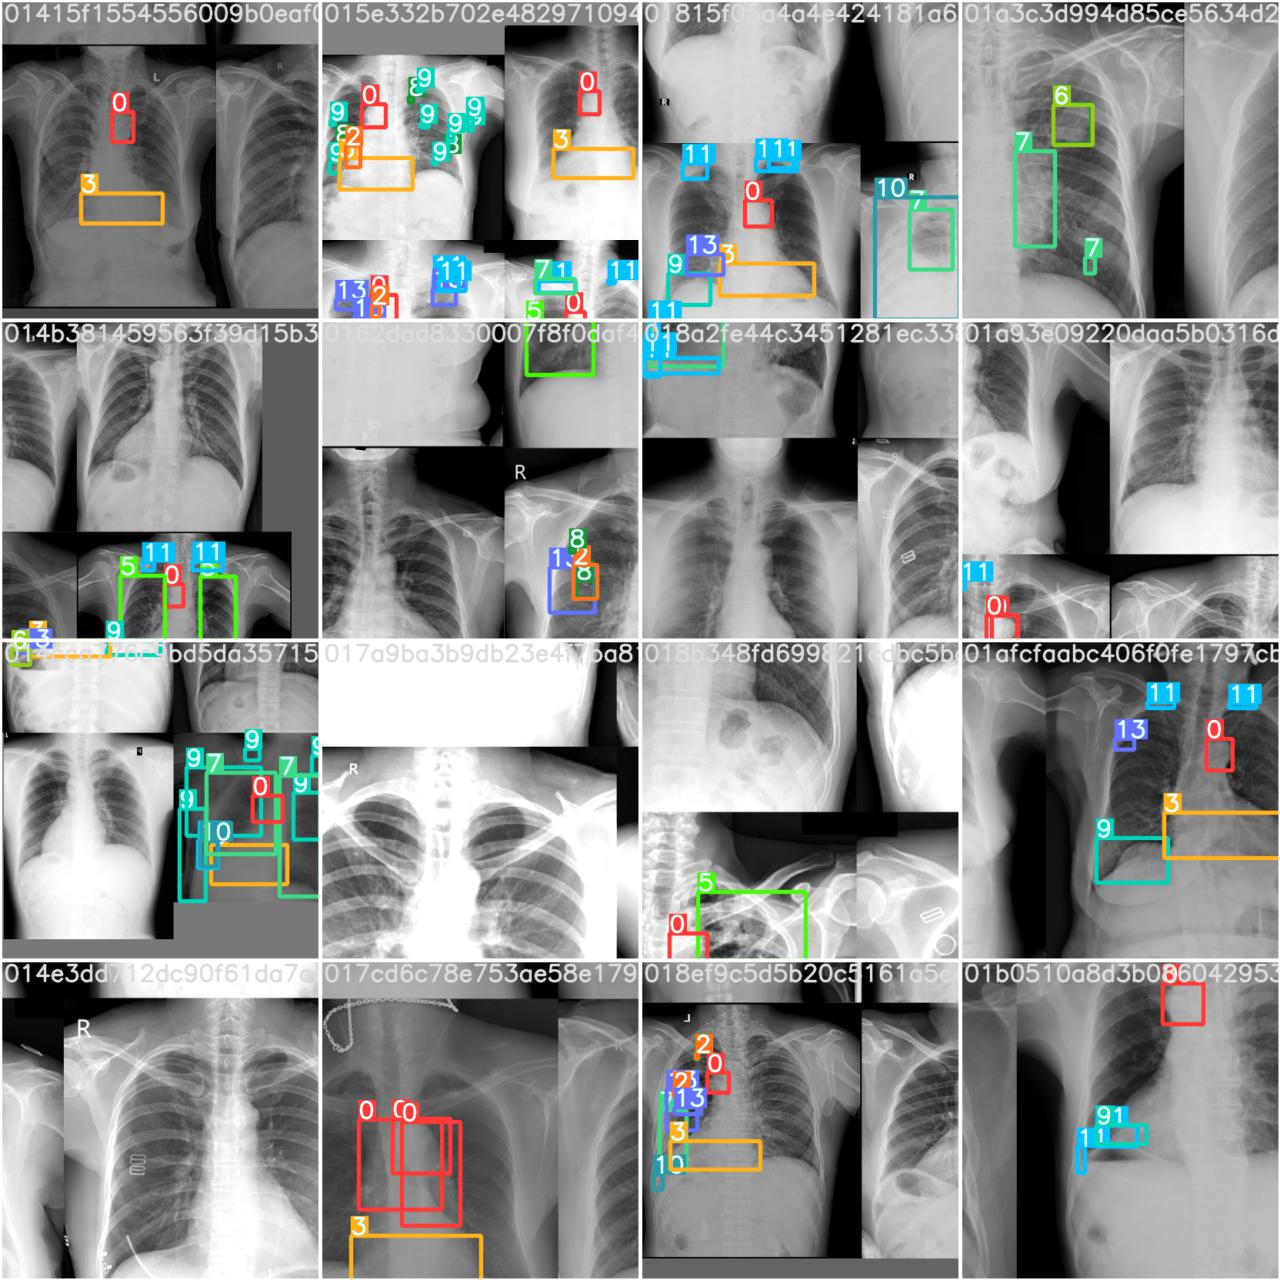

In [6]:
display.Image("./train_batch2.jpg")

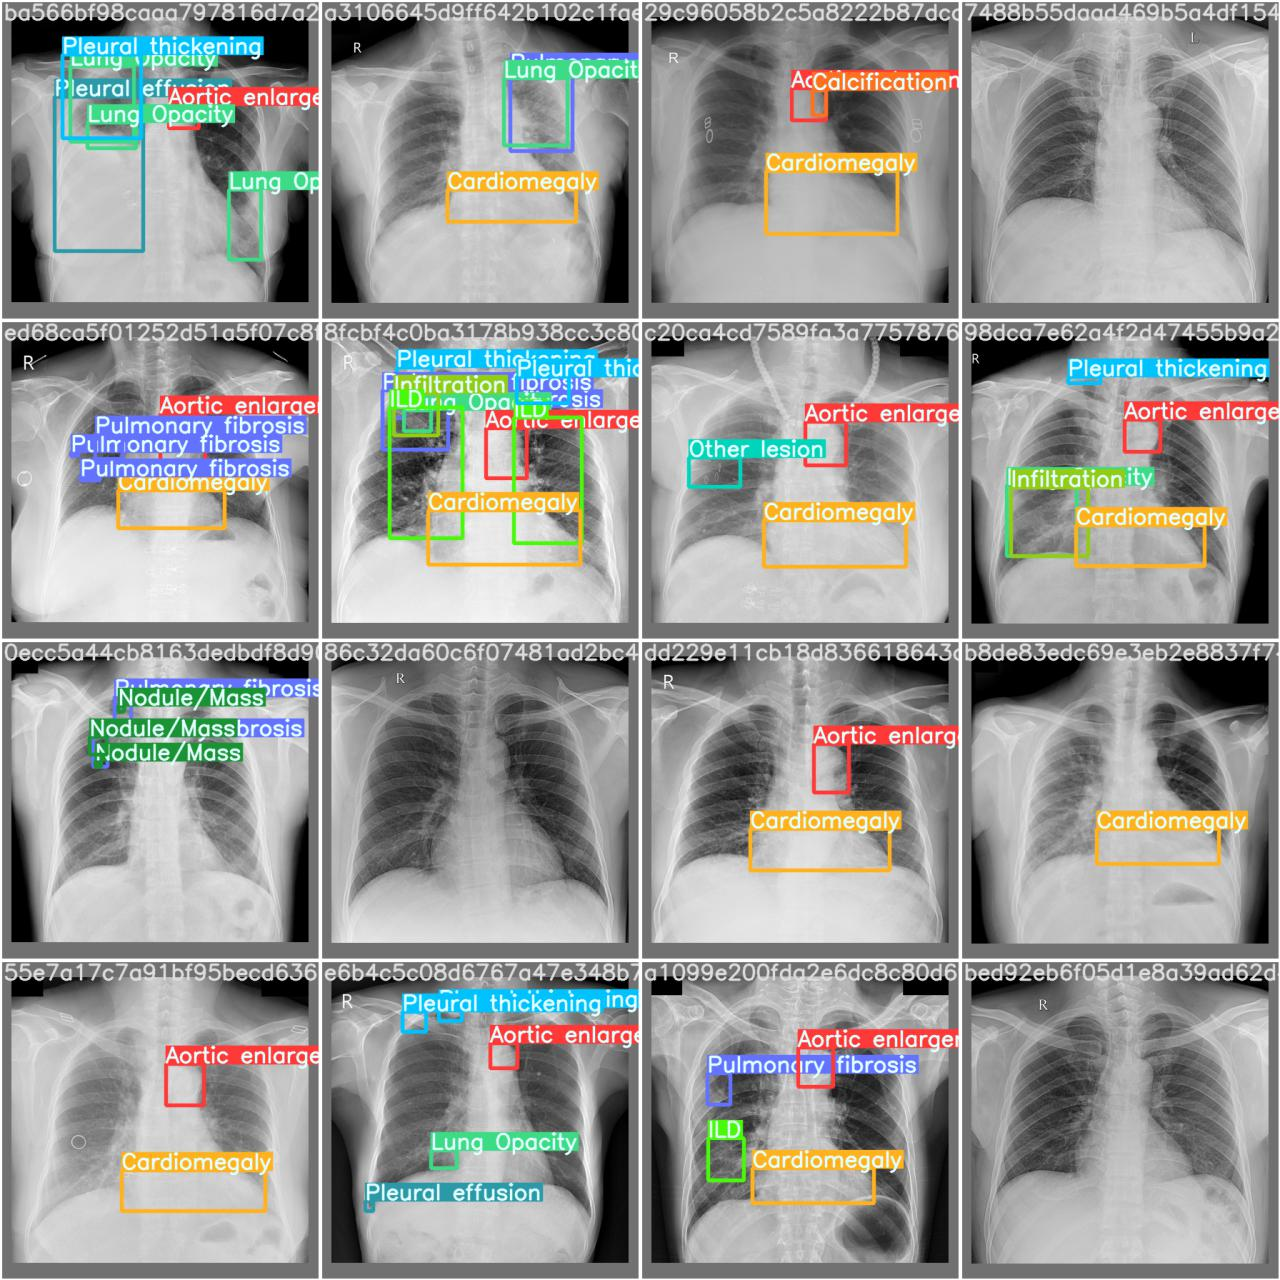

In [7]:
display.Image("./test_batch2_labels.jpg")

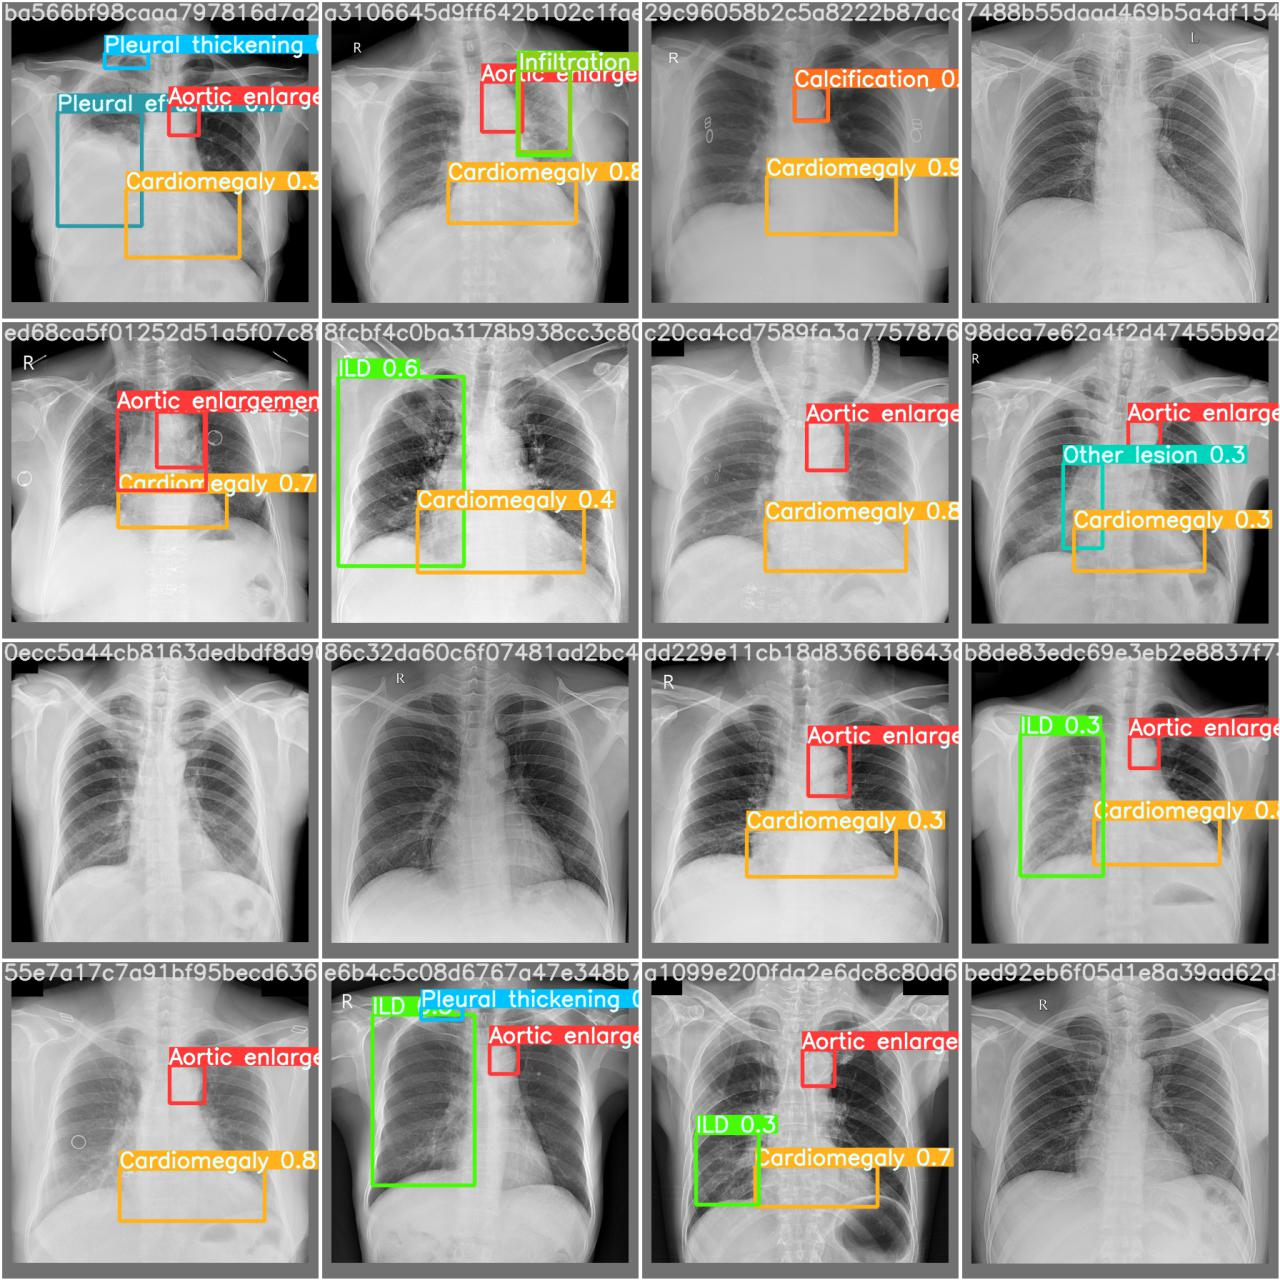

In [8]:
display.Image("./test_batch2_pred.jpg")

## 5. Conclusions and perspectives <a class="anchor" id="5"></a>

Through this project, I was able to apply the knowledge acquired during the programme. I was also able to discover a new working environment via Google Colab and to gain a solid basic knowledge of image detection. 

To summarise:

* I have a model able to accurately predict whether a patient is healthy or has one of the 13 diseases listed.

* The model for locating one or more diseases on a X-ray works but with lower accuracy than the more basic model of classifying whether a patient is ill or not. However, the latter was calculated with a relatively small number of 50 epochs.
    
* The EDA shows us that for some diseases a very small number of X-rays is present. This explains why, in the confusion matrix of the Yolo algorithm, we have very good results for some diseases and bad for others. We can observe as well that the background images (no finding class) are often predicted even is the X-ray contains diseases. A model without negative samples should be trained and compared to these results.

* The accuracy of the detection model is around 0.45 but seems to linearly increase with the number of epochs.